## LSTM

In [1]:
from datapackage import Package

package = Package('https://datahub.io/core/global-temp/datapackage.json')

for resource in package.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        data = resource.read()

data_gcag = data[0:len(data):2][::-1]

In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

Y = np.zeros(shape=(len(data_gcag), 1), dtype=np.float32)

for i, y in enumerate(data_gcag):
    Y[i - 1, 0] = y[2]

mmscaler = MinMaxScaler((-1.0, 1.0))
Y = mmscaler.fit_transform(Y)

In [3]:
nb_samples = 1600
nb_test_samples = 200
sequence_length = 20

X_ts = np.zeros(shape=(nb_samples - sequence_length, sequence_length, 1), dtype=np.float32)
Y_ts = np.zeros(shape=(nb_samples - sequence_length, 1), dtype=np.float32)

for i in range(0, nb_samples - sequence_length):
    X_ts[i] = Y[i:i + sequence_length]
    Y_ts[i] = Y[i + sequence_length]

X_ts_train = X_ts[0:nb_samples - nb_test_samples, :]
Y_ts_train = Y_ts[0:nb_samples - nb_test_samples]

X_ts_test = X_ts[nb_samples - nb_test_samples:, :]
Y_ts_test = Y_ts[nb_samples - nb_test_samples:]

In [4]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation,Flatten

model = Sequential()

#Quando uma LSTM é seguida por outra camada LSTM, a primeira deve ter o parâmetro return_sequences=True. 
#model.add(LSTM(8, stateful=True, return_sequences=True, batch_input_shape=(20, sequence_length, 1)))

model.add(LSTM(8, stateful=True, batch_input_shape=(20, sequence_length, 1)))
model.add(Flatten())
model.add(Dense(1))
model.add(Activation('linear'))

In [5]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001, decay=0.0001),
              loss='mse',
              metrics=['mse'])

In [6]:
history = model.fit(X_ts_train, Y_ts_train,
          batch_size=20,
          epochs=100,
          shuffle=False,
          validation_data=(X_ts_test, Y_ts_test))


Epoch 1/100
70/70 [==============================] - 4s 17ms/step - loss: 0.0717 - mse: 0.0717 - val_loss: 0.1033 - val_mse: 0.1033
Epoch 2/100
70/70 [==============================] - 0s 6ms/step - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0807 - val_mse: 0.0807
Epoch 3/100
70/70 [==============================] - 0s 6ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0648 - val_mse: 0.0648
Epoch 4/100
70/70 [==============================] - 0s 7ms/step - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0540 - val_mse: 0.0540
Epoch 5/100
70/70 [==============================] - 0s 6ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0464 - val_mse: 0.0464
Epoch 6/100
70/70 [==============================] - 0s 6ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0409 - val_mse: 0.0409
Epoch 7/100
70/70 [==============================] - 0s 7ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 8/100
70/70 [==============================] - 0s 6ms/step - loss: 0.0138 - 

70/70 [==============================] - 0s 7ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 64/100
70/70 [==============================] - 0s 7ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 65/100
70/70 [==============================] - 0s 7ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 66/100
70/70 [==============================] - 0s 7ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 67/100
70/70 [==============================] - 0s 7ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 68/100
70/70 [==============================] - 0s 7ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 69/100
70/70 [==============================] - 0s 7ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 70/100
70/70 [==============================] - 0s 7ms/step - loss: 0.0102 - mse: 0

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


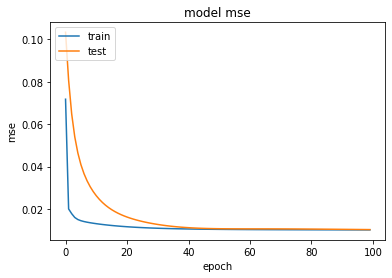

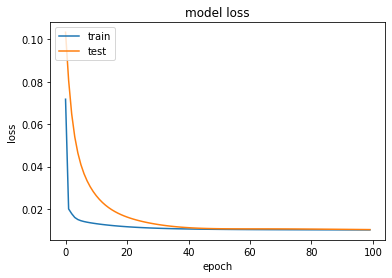

In [7]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

70/70 [==============================] - 1s 4ms/step


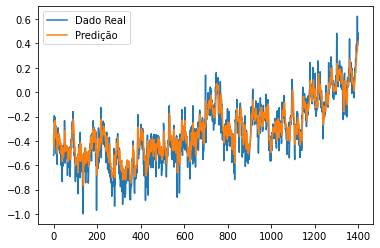

In [8]:
# summarize history for loss
plt.plot(Y_ts_train)
plt.plot(model.predict(X_ts_train, batch_size=20))
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
plt.legend(['Dado Real', 'Predição'], loc='upper left')
plt.show()

9/9 [==============================] - 0s 4ms/step


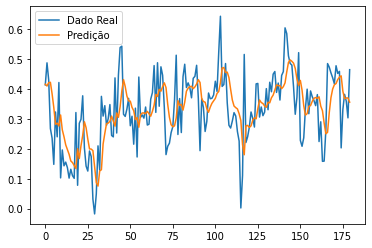

In [9]:
# summarize history for loss
plt.plot(Y_ts_test)
plt.plot(model.predict(X_ts_test, batch_size=20))
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
plt.legend(['Dado Real', 'Predição'], loc='upper left')
plt.show()

## Autoencoder

### Standard Autoencoder

In [3]:
import numpy as np
from PIL import Image

from keras.datasets import fashion_mnist

(X_train, _), (_, _) = fashion_mnist.load_data()

nb_samples = 1000
nb_epochs = 400
batch_size = 200
code_length = 256

X_train = X_train.astype(np.float32)[0:nb_samples] / 255.0

width = X_train.shape[1]
height = X_train.shape[2]

In [189]:
from keras.layers import Dense, Flatten, Conv2D,Conv2DTranspose
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

graph = tf.Graph()

with graph.as_default():
    input_images = tf.placeholder(tf.float32, shape=(None, width, height, 1))
    
    r_input_images = tf.image.resize_images(input_images, (32, 32))
    
    # Encoder
    conv_0 = Conv2D(filters=32,
                      kernel_size=(3, 3),
                      strides=(2, 2),
                      activation=tf.nn.relu,
                      padding='same')(r_input_images)
    
    conv_1 = Conv2D(filters=64,
                      kernel_size=(3, 3),
                      activation=tf.nn.relu,
                      padding='same')(conv_0)
    
    conv_2 = Conv2D(filters=128,
                      kernel_size=(3, 3),
                      activation=tf.nn.relu,
                      padding='same')(conv_1)
    
    # Code layer
    code_input = Flatten()(conv_2)
    
    code_layer = Dense(units=code_length,
                         activation=tf.nn.sigmoid)(code_input)
    
    # Decoder
    decoder_input = tf.reshape(code_layer, (-1, 16, 16, 1))
    
    convt_0 = Conv2DTranspose(filters=128,
                                 kernel_size=(3, 3),
                                 strides=(2, 2),
                                 activation=tf.nn.relu,
                                 padding='same')(decoder_input)
    
    convt_1 = Conv2DTranspose(filters=64,
                                 kernel_size=(3, 3),
                                 activation=tf.nn.relu,
                                 padding='same')(convt_0)
    
    convt_2 = Conv2DTranspose(filters=32,
                                 kernel_size=(3, 3),
                                 activation=tf.nn.relu,
                                 padding='same')(convt_1)
    
    convt_3 = Conv2DTranspose(filters=1,
                                 kernel_size=(3, 3),
                                 activation=tf.sigmoid,
                                 padding='same')(convt_2)
    
    # Loss
    loss = tf.nn.l2_loss(convt_3 - r_input_images)
    
    # Training step
    training_step = tf.train.AdamOptimizer(0.001).minimize(loss)

In [191]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

session = tf.InteractiveSession(graph=graph)
tf.global_variables_initializer().run()

for e in range(nb_epochs):
    np.random.shuffle(X_train)
    
    total_loss = 0.0
    
    for i in range(0, nb_samples - batch_size, batch_size):
        X = np.zeros((batch_size, width, height, 1), dtype=np.float32)
        X[:, :, :, 0] = X_train[i:i + batch_size, :, :]
        
        _, n_loss = session.run([training_step, loss], 
                                feed_dict={
                                    input_images: X
                                })
        total_loss += n_loss
        
    print('Epoch {}) Total loss: {}'.format(e + 1, total_loss))

Epoch 1) Total loss: 64295.1083984375
Epoch 2) Total loss: 51752.0009765625
Epoch 3) Total loss: 39843.7431640625
Epoch 4) Total loss: 33155.103515625
Epoch 5) Total loss: 27853.87353515625
Epoch 6) Total loss: 24710.5244140625
Epoch 7) Total loss: 23183.787109375
Epoch 8) Total loss: 21983.7578125
Epoch 9) Total loss: 21211.9150390625
Epoch 10) Total loss: 20439.03369140625
Epoch 11) Total loss: 19644.97314453125
Epoch 12) Total loss: 19190.537109375
Epoch 13) Total loss: 18438.12353515625
Epoch 14) Total loss: 18062.25830078125
Epoch 15) Total loss: 17476.93310546875
Epoch 16) Total loss: 16359.732177734375
Epoch 17) Total loss: 15654.0302734375
Epoch 18) Total loss: 14311.017578125
Epoch 19) Total loss: 12922.913818359375
Epoch 20) Total loss: 11595.836181640625
Epoch 21) Total loss: 10193.550048828125
Epoch 22) Total loss: 8945.36083984375
Epoch 23) Total loss: 8041.878173828125
Epoch 24) Total loss: 7193.478759765625
Epoch 25) Total loss: 6656.6912841796875
Epoch 26) Total loss: 6

Epoch 203) Total loss: 820.1187438964844
Epoch 204) Total loss: 822.1236419677734
Epoch 205) Total loss: 837.7859039306641
Epoch 206) Total loss: 895.2823944091797
Epoch 207) Total loss: 949.7849731445312
Epoch 208) Total loss: 835.1707000732422
Epoch 209) Total loss: 950.5208740234375
Epoch 210) Total loss: 843.6034240722656
Epoch 211) Total loss: 858.0288696289062
Epoch 212) Total loss: 828.9719543457031
Epoch 213) Total loss: 839.8622741699219
Epoch 214) Total loss: 876.86083984375
Epoch 215) Total loss: 808.6559906005859
Epoch 216) Total loss: 827.1439056396484
Epoch 217) Total loss: 815.9294281005859
Epoch 218) Total loss: 803.5347747802734
Epoch 219) Total loss: 775.7478942871094
Epoch 220) Total loss: 804.1312408447266
Epoch 221) Total loss: 862.3652038574219
Epoch 222) Total loss: 959.0742492675781
Epoch 223) Total loss: 994.7584991455078
Epoch 224) Total loss: 842.5361328125
Epoch 225) Total loss: 877.1988067626953
Epoch 226) Total loss: 854.4855804443359


KeyboardInterrupt: 

In [192]:
import numpy as np

codes = session.run([code_layer], 
                    feed_dict={
                        input_images: np.expand_dims(X_train, axis=3),
                    })[0]

print(np.mean(codes))

0.5324642


In [193]:
import numpy as np

Xs = np.reshape(X_train[0:10], (10, width, height, 1))

Ys = session.run([convt_3], 
                 feed_dict={
                     input_images: Xs
                })

Ys = np.squeeze(Ys[0] * 255.0)

In [231]:
    for i in range(0,10):
        im = Image.fromarray(X_train[i] * 255.0)
        if im.mode != 'RGB':
            im = im.convert('RGB')
        IPython.display.display(im)

        im = Image.fromarray(Ys[i])
        if im.mode != 'RGB':
            im = im.convert('RGB')
        IPython.display.display(im)

### denoising autoencoder

In [219]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

graph = tf.Graph()

with graph.as_default():
    input_noisy_images = tf.placeholder(tf.float32, shape=(None, width, height, 1))
    input_images = tf.placeholder(tf.float32, shape=(None, width, height, 1))
  
    # Encoder
    conv_0 = Conv2D(filters=32,
                      kernel_size=(3, 3),
                      activation=tf.nn.relu,
                      padding='same')(input_noisy_images)
    
    conv_1 = Conv2D(filters=64,
                      kernel_size=(3, 3),
                      activation=tf.nn.relu,
                      padding='same')(conv_0)
    
    conv_2 = Conv2D(filters=128,
                      kernel_size=(3, 3),
                      activation=tf.nn.relu,
                      padding='same')(conv_1)
    
    # Code layer
    code_input = Flatten()(conv_2)
    
    code_layer = Dense(units=width * height,
                         activation=tf.nn.sigmoid)(code_input)    
    # Decoder
    decoder_input = tf.reshape(code_layer, (-1, width, height, 1))
    
    convt_0 = Conv2DTranspose(filters=128,
                                 kernel_size=(3, 3),
                                 activation=tf.nn.relu,
                                 padding='same')(decoder_input)
    
    convt_1 = Conv2DTranspose(filters=64,
                                 kernel_size=(3, 3),
                                 activation=tf.nn.relu,
                                 padding='same')(convt_0)
    
    convt_2 = Conv2DTranspose(filters=32,
                                 kernel_size=(3, 3),
                                 activation=tf.nn.relu,
                                 padding='same')(convt_1)
    
    convt_3 = Conv2DTranspose(filters=1,
                                 kernel_size=(3, 3),
                                 activation=tf.sigmoid,
                                 padding='same')(convt_2)
    
    # Loss
    loss = tf.nn.l2_loss(convt_3 - input_images)
    
    # Training step
    training_step = tf.train.AdamOptimizer(0.001).minimize(loss)

In [220]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


session = tf.InteractiveSession(graph=graph)
tf.global_variables_initializer().run()

for e in range(nb_epochs):
    total_loss = 0.0
    
    for i in range(0, nb_samples - batch_size, batch_size):
        X = np.zeros((batch_size, width, height, 1), dtype=np.float32)
        X[:, :, :, 0] = X_train[i:i + batch_size, :, :]
        Xn = np.clip(X + np.random.normal(0.0, 0.2, size=(batch_size, width, height, 1)), 0.0, 1.0)
        
        _, n_loss = session.run([training_step, loss], 
                                feed_dict={
                                    input_images: X,
                                    input_noisy_images: Xn
                                })
        total_loss += n_loss
        
    print('Epoch {}) Total loss: {}'.format(e + 1, total_loss))

Epoch 1) Total loss: 45172.6357421875
Epoch 2) Total loss: 32639.70751953125


KeyboardInterrupt: 

In [246]:
import numpy as np


#Generate Noisy dataset
X = np.zeros((len(X_train), width, height, 1), dtype=np.float32)
X[:, :, :, 0] = X_train
Xn = np.clip(X + np.random.normal(0.0, 0.2, size=(len(X), width, height, 1)), 0.0, 1.0)
        

codes = session.run([code_layer], 
                    feed_dict={
                        input_noisy_images: Xn
                    })[0]

print(np.mean(codes))

0.6577547


In [247]:
import numpy as np

Xs = np.reshape(Xn[0:10], (10, width, height, 1))

Ys = session.run([convt_3], 
                 feed_dict={
                     input_noisy_images: Xs
                })

Ys = np.squeeze(Ys[0] * 255.0)

In [248]:
for i in range(0,10):
    im = Image.fromarray(X_train[i] * 255.0)
    if im.mode != 'RGB':
        im = im.convert('RGB')
    IPython.display.display(im)
    
    im = Image.fromarray(Ys[i])
    if im.mode != 'RGB':
        im = im.convert('RGB')
    IPython.display.display(im)

### Sparse autoencoder

In [249]:
import numpy as np

from keras.datasets import fashion_mnist

(X_train, _), (_, _) = fashion_mnist.load_data()

nb_samples = 1000
nb_epochs = 400
batch_size = 200
code_length = 256

X_train = X_train.astype(np.float32)[0:nb_samples] / 255.0

width = X_train.shape[1]
height = X_train.shape[2]

In [251]:
from keras.layers import Dense, Flatten, Conv2D,Conv2DTranspose
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

graph = tf.Graph()

with graph.as_default():
    input_images = tf.placeholder(tf.float32, shape=(None, width, height, 1))
    
    r_input_images = tf.image.resize_images(input_images, (32, 32))
    
    # Encoder
    conv_0 = Conv2D(filters=32,
                      kernel_size=(3, 3),
                      strides=(2, 2),
                      activation=tf.nn.relu,
                      padding='same')(r_input_images)
    
    conv_1 = Conv2D(filters=64,
                      kernel_size=(3, 3),
                      activation=tf.nn.relu,
                      padding='same')(conv_0)
    
    conv_2 = Conv2D(filters=128,
                      kernel_size=(3, 3),
                      activation=tf.nn.relu,
                      padding='same')(conv_1)
    
    # Code layer
    code_input = Flatten()(conv_2)
    
    code_layer = Dense(units=code_length,
                         activation=tf.nn.sigmoid)(code_input)
    
    # Decoder
    decoder_input = tf.reshape(code_layer, (-1, 16, 16, 1))
    
    convt_0 = Conv2DTranspose(filters=128,
                                 kernel_size=(3, 3),
                                 strides=(2, 2),
                                 activation=tf.nn.relu,
                                 padding='same')(decoder_input)
    
    convt_1 = Conv2DTranspose(filters=64,
                                 kernel_size=(3, 3),
                                 activation=tf.nn.relu,
                                 padding='same')(convt_0)
    
    convt_2 = Conv2DTranspose(filters=32,
                                 kernel_size=(3, 3),
                                 activation=tf.nn.relu,
                                 padding='same')(convt_1)
    
    convt_3 = Conv2DTranspose(filters=1,
                                 kernel_size=(3, 3),
                                 activation=tf.sigmoid,
                                 padding='same')(convt_2)
    
    # Loss
    sparsity_constraint = tf.reduce_sum(0.001 * tf.norm(code_layer, ord=1, axis=1))
    loss = tf.nn.l2_loss(convt_3 - r_input_images) + sparsity_constraint

    
    # Training step
    training_step = tf.train.AdamOptimizer(0.001).minimize(loss)

In [252]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

session = tf.InteractiveSession(graph=graph)
tf.global_variables_initializer().run()

for e in range(nb_epochs):
    np.random.shuffle(X_train)
    
    total_loss = 0.0
    
    for i in range(0, nb_samples - batch_size, batch_size):
        X = np.zeros((batch_size, width, height, 1), dtype=np.float32)
        X[:, :, :, 0] = X_train[i:i + batch_size, :, :]
        
        _, n_loss = session.run([training_step, loss], 
                                feed_dict={
                                    input_images: X
                                })
        total_loss += n_loss
        
    print('Epoch {}) Total loss: {}'.format(e + 1, total_loss))

Epoch 1) Total loss: 60323.5048828125
Epoch 2) Total loss: 39640.9921875
Epoch 3) Total loss: 36335.1806640625


KeyboardInterrupt: 

In [253]:
import numpy as np

codes = session.run([code_layer], 
                    feed_dict={
                        input_images: np.expand_dims(X_train, axis=3),
                    })[0]

print(np.mean(codes))

0.61094445


In [254]:
import numpy as np

Xs = np.reshape(X_train[0:10], (10, width, height, 1))

Ys = session.run([convt_3], 
                 feed_dict={
                     input_images: Xs
                })

Ys = np.squeeze(Ys[0] * 255.0)

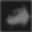

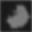

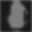

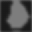

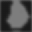

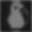

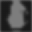

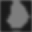

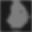

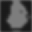

In [255]:
for i in range(0,10):
    im = Image.fromarray(X_train[i] * 255.0)
    if im.mode != 'RGB':
        im = im.convert('RGB')
    IPython.display.display(im)
    
    im = Image.fromarray(Ys[i])
    if im.mode != 'RGB':
        im = im.convert('RGB')
    IPython.display.display(im)

### variational autoencoder

In [28]:
from keras.layers import Dense, Flatten, Conv2D,Conv2DTranspose

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

graph = tf.Graph()

with graph.as_default():
    input_images = tf.placeholder(tf.float32, shape=(batch_size, width, height, 1))
    
    # Encoder
    conv_0 = Conv2D(filters=32,
                              kernel_size=(3, 3),
                              strides=(2, 2),
                              activation=tf.nn.relu,
                              padding='same')(input_images)
    
    conv_1 = Conv2D(filters=64,
                              kernel_size=(3, 3),
                              strides=(2, 2),
                              activation=tf.nn.relu,
                              padding='same')(conv_0)
    
    conv_2 = Conv2D(filters=128,
                              kernel_size=(3, 3),
                              activation=tf.nn.relu,
                              padding='same')(conv_1)
    
    # Code layer
    code_input = Flatten()(conv_2)
    
    code_mean = Dense(units=width * height)(code_input)
    
    code_log_variance = Dense(units=width * height)(code_input)
    
    code_std = tf.sqrt(tf.exp(code_log_variance))
    
    # Normal samples
    normal_samples = tf.random_normal(mean=0.0, stddev=1.0, shape=(batch_size, width * height))
    
    # Sampled code
    sampled_code = (normal_samples * code_std) + code_mean
    
    # Decoder
    decoder_input = tf.reshape(sampled_code, (-1, 7, 7, 16))
    
    convt_0 = Conv2DTranspose(filters=64,
                                         kernel_size=(3, 3),
                                         strides=(2, 2),
                                         activation=tf.nn.relu,
                                         padding='same')(decoder_input)
    
    convt_1 = Conv2DTranspose(filters=32,
                                        kernel_size=(3, 3),
                                        strides=(2, 2),
                                        activation=tf.nn.relu,
                                        padding='same')(convt_0)
    
    convt_2 = Conv2DTranspose(filters=1,
                                        kernel_size=(3, 3),
                                        padding='same')(convt_1)
    
    convt_output = tf.nn.sigmoid(convt_2)
    
    
    # Loss
    reconstruction = tf.nn.sigmoid_cross_entropy_with_logits(logits=convt_2, labels=input_images)
    kl_divergence = 0.5 * tf.reduce_sum(tf.square(code_mean) + tf.square(code_std) - tf.log(1e-8 + tf.square(code_std)) - 1, axis=1) 
    
    loss = tf.reduce_sum(reconstruction) + kl_divergence
    
    # Training step
    training_step = tf.train.AdamOptimizer(0.001).minimize(loss)

In [29]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

session = tf.InteractiveSession(graph=graph)
tf.global_variables_initializer().run()

for e in range(nb_epochs):
    np.random.shuffle(X_train)
    
    total_loss = 0.0
    
    for i in range(0, nb_samples - batch_size, batch_size):
        X = np.zeros((batch_size, width, height, 1), dtype=np.float32)
        X[:, :, :, 0] = X_train[i:i + batch_size, :, :]
        
        _, n_loss = session.run([training_step, loss], 
                                feed_dict={
                                    input_images: X
                                })
        total_loss += n_loss
        
    print('Epoch {}) Total loss: {}'.format(e + 1, total_loss))

D:\Backup\Dropbox\Jupyter\venv\lib\site-packages\tensorflow\python\client\session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1) Total loss: [432255.8  432359.   432246.97 432197.4  432490.03 432305.06 432316.6
 432158.9  432188.28 432220.78 432162.44 432254.44 432174.62 432305.5
 432294.6  432261.62 432228.06 432213.12 432298.38 432300.62 432431.9
 432317.25 432365.3  432215.88 432260.66 432202.44 432273.7  432256.53
 432249.   432268.12 432411.06 432460.25 432224.6  432275.66 432197.75
 432471.12 432223.84 432199.12 432240.84 432266.5  432287.53 432495.8
 432176.38 432225.56 432211.8  432214.78 432378.75 432337.84 432241.6
 432241.72 432275.16 432244.34 432327.25 432297.25 432174.66 432244.88
 432243.84 432225.44 432215.25 432275.25 432428.25 432459.12 432185.7
 432230.88 432170.75 432329.8  432284.8  432279.88 432209.75 432188.06
 432235.25 432189.62 432372.5  432193.3  432193.47 432202.56 432416.88
 432168.6  432400.2  432317.38 432249.3  432374.97 432197.6  432167.75
 432403.56 432300.34 432309.8  432292.66 432275.5  432205.06 432325.12
 432231.84 432235.7  432402.44 432178.03 432309.5  432253.25 4

Epoch 6) Total loss: [275289.06 275385.8  275404.66 277382.3  276388.84 276797.56 277974.38
 275966.88 276208.6  276524.25 277850.7  275789.84 276055.72 275631.3
 277505.06 275633.88 277407.56 277816.22 277295.53 276703.22 275846.9
 276480.94 274933.2  275960.12 277628.88 275390.28 276249.75 276010.34
 275819.06 276151.38 276461.06 275647.44 276184.06 276582.62 276433.38
 276608.97 275478.6  276945.25 275529.75 276263.1  276190.28 277571.88
 276219.1  275066.38 277137.75 276028.7  275708.06 278129.38 277363.56
 276169.22 276706.56 275378.6  275437.1  276540.22 278043.47 275607.25
 276641.   276655.56 276736.   275956.1  275953.1  275546.2  277133.4
 276583.   277923.6  277360.38 278041.53 277653.4  277074.03 275664.53
 275467.03 276454.9  276429.12 274718.   276838.84 275604.56 276026.75
 275576.75 277566.44 276656.5  276300.47 277858.97 276613.47 276523.53
 274940.12 276973.88 276172.03 276238.75 275662.66 276398.2  276576.6
 276812.66 275750.66 276710.06 277103.25 276043.97 277716.9 

Epoch 11) Total loss: [219896.25 218341.92 219154.86 217471.66 218450.9  219717.03 218742.17
 219017.03 219579.6  219298.2  219497.92 219299.56 220161.81 218783.
 220280.4  220246.   218601.56 218683.67 218965.17 219438.6  218344.14
 219817.61 219219.31 219124.72 220169.28 219132.9  219101.52 219131.55
 218454.64 220067.22 219488.34 218368.53 218688.67 219795.55 219406.84
 218074.89 218182.44 219731.52 219498.17 218783.31 217027.16 219518.52
 218876.52 218816.03 218899.12 220724.45 217627.7  218570.81 218555.25
 219342.   219576.06 219166.89 218637.94 218966.16 219252.03 217173.86
 218147.72 218954.98 219098.62 219548.4  220072.1  218351.52 219935.52
 217735.77 220570.08 219624.72 218950.75 219097.88 219338.06 217589.16
 219343.8  220768.42 220571.6  220145.31 220147.22 220007.34 219661.31
 219943.6  219090.   219182.28 219361.92 219491.19 218921.62 219658.62
 220162.28 219734.6  218448.83 218672.56 219327.1  217569.39 219615.72
 220245.81 219079.77 219440.61 220182.69 219123.23 218213

Epoch 16) Total loss: [197025.72 197827.45 197567.81 197599.36 198359.   197850.88 197165.47
 197562.33 197338.12 197923.31 197391.12 197514.34 197036.88 197633.72
 197407.81 199188.4  198192.69 197341.14 197001.4  197730.1  197221.17
 197849.06 198064.98 198038.94 197959.3  197904.94 198233.4  196645.1
 197452.86 197854.58 197251.34 198112.42 198089.56 197221.17 198359.47
 197277.9  197488.   197541.   197642.81 197014.5  197547.95 196177.34
 197842.6  197893.92 198250.7  197091.95 196691.33 197386.34 199341.58
 197705.89 197538.88 197468.58 198198.45 196948.5  198746.4  197513.22
 196090.89 197312.7  197756.34 197479.5  198184.4  198870.11 197193.78
 197527.14 197882.95 196463.98 198380.34 198587.   196778.8  198121.56
 197865.67 196377.03 198391.25 198445.53 199126.39 196805.69 197668.03
 197929.44 197219.5  196949.58 197883.86 197437.97 195846.34 197753.55
 197745.67 198293.88 197528.69 197997.52 197007.88 198660.73 199182.38
 197941.75 197974.6  197811.53 197967.05 197704.83 19815

Epoch 21) Total loss: [190427.9  191284.89 190186.78 191099.84 191259.88 189956.38 190321.12
 190728.81 189264.22 190597.89 190860.25 190222.27 190374.8  190432.03
 189268.9  190524.12 189523.84 190244.48 189836.5  190243.7  190829.34
 190519.55 190416.44 189607.23 190642.31 190064.62 190045.17 190172.47
 190541.81 192246.47 190431.06 190190.9  191829.81 190746.19 190103.44
 190993.27 189659.03 190289.53 191149.75 190029.6  190012.   190035.1
 190457.53 190293.38 191484.66 191895.12 190049.73 189780.4  190762.72
 191002.83 189753.55 189112.94 191730.53 190315.25 189715.3  190053.45
 190565.38 190644.95 190857.05 190376.98 188893.55 190676.78 189706.95
 189643.16 189174.69 191684.06 190838.53 190735.12 189476.73 190302.88
 190898.08 190198.19 191284.16 190141.05 190578.16 190667.38 188329.66
 190672.66 190971.69 190171.88 191410.31 190904.72 190509.62 189469.02
 189206.92 191130.88 190575.84 190858.94 189906.9  189653.42 190314.5
 190169.34 190190.62 189731.06 189814.03 190424.1  189731

Epoch 26) Total loss: [185078.22 185737.86 184929.27 186776.1  185551.12 185463.75 184906.58
 185414.58 185264.66 185321.1  185986.47 185598.81 185424.52 185067.02
 184483.25 183959.78 185324.19 184693.6  184903.   183940.66 184717.67
 185262.6  184766.12 186119.44 185335.84 185234.45 186241.6  185092.4
 185136.7  184709.48 185051.75 184737.16 185377.03 184667.98 185480.48
 185295.1  184899.92 186182.23 185963.19 185088.22 185116.86 184384.72
 185110.9  184893.5  184938.75 184455.34 184398.2  185810.36 184862.69
 184870.97 185519.12 185483.69 184042.31 184396.14 184556.52 184857.66
 185172.25 185251.9  184895.94 184869.03 185016.08 184126.38 184545.
 185965.5  184443.27 184859.06 185088.52 185979.48 185630.9  185658.94
 185371.55 185896.53 186125.19 185828.28 184779.25 186374.38 185856.64
 185477.6  184913.4  184537.78 184635.34 184996.53 184969.5  184723.98
 184642.3  185448.4  185500.72 184389.86 185072.44 184792.14 184839.7
 184699.28 184361.81 185577.03 185357.48 185359.14 185009.3

Epoch 31) Total loss: [181610.39 181113.92 181905.03 182322.38 181696.4  181575.75 180809.06
 181010.47 181722.16 181141.36 181475.97 182163.81 181814.34 181742.12
 181484.67 181491.36 181902.81 181187.27 181349.28 181542.72 181537.05
 181296.84 182142.66 182505.95 181222.53 182359.25 181878.4  182094.66
 181579.12 181955.98 182400.12 181268.94 182793.19 181569.55 182394.34
 181738.33 180967.97 181356.7  181816.25 182009.38 181293.16 180182.31
 181894.1  181663.67 181693.34 180974.47 182469.03 182124.56 181979.12
 182115.34 181374.31 181491.11 181580.47 181825.81 181946.52 181777.72
 181226.84 182848.66 180864.34 181297.19 182329.17 180922.77 181077.19
 182314.1  182278.62 181975.89 181642.5  181686.3  181334.55 180877.52
 182387.62 181157.58 181474.75 181518.33 181613.22 181390.31 180863.44
 182127.75 182534.9  182028.45 181494.22 181176.12 181018.   182595.19
 180973.31 182010.4  181561.94 180723.95 181191.66 181805.84 181593.17
 181805.69 181213.03 181843.72 182061.23 181217.75 1822

Epoch 35) Total loss: [179861.77 179848.89 179495.78 179110.64 179495.58 179921.23 179350.94
 178918.22 178900.92 178714.78 179185.17 179197.1  179565.14 179509.31
 179737.44 179395.45 178251.16 179240.7  179583.03 179633.05 179971.78
 178493.53 179235.34 178750.89 179086.05 179507.53 179748.05 179931.81
 178326.66 179561.88 178725.67 178985.53 179498.73 178856.2  179324.72
 179409.56 178981.03 178870.94 177894.28 179355.64 179385.34 179339.12
 180275.78 179191.48 178968.03 179554.44 180185.19 178622.38 178017.72
 179007.8  178446.28 179030.7  178815.44 179794.14 178587.2  179510.08
 179153.78 178943.97 179933.89 178538.84 179134.23 179753.52 179578.25
 178888.38 179513.52 178994.89 178763.56 179568.   178392.22 178584.6
 178229.56 180111.48 178962.17 179475.53 179751.38 179733.   178352.52
 179784.84 179635.97 180738.1  179021.67 178717.52 179849.97 178593.27
 179422.33 179056.34 178753.84 179695.97 179757.86 178652.9  178981.31
 179564.3  178927.4  179296.69 178056.31 178924.9  17931

Epoch 40) Total loss: [177740.2  176866.48 178663.19 178243.06 177731.78 178236.69 177415.52
 177718.4  178641.19 177563.6  178344.27 178247.03 178830.44 178034.55
 177686.03 177866.95 177837.78 178524.69 177097.8  177666.44 177909.38
 177647.58 177433.25 177555.31 178296.06 178037.02 177634.25 177578.3
 177998.19 177931.97 178807.7  177527.66 177666.14 178189.06 177762.
 177591.22 177197.97 177474.03 177831.42 178227.86 178224.28 177180.52
 177640.98 178408.   178136.27 177319.03 178792.05 178540.08 178956.84
 177680.62 177828.78 177721.11 177617.69 178229.47 177894.33 178178.03
 177764.5  176887.81 177554.05 178804.27 178426.34 177460.47 177825.66
 176914.38 178435.27 178264.88 178827.66 177761.95 177484.19 178434.48
 178004.7  176983.67 177467.36 178255.16 178151.47 177471.34 178415.34
 177691.9  178755.38 177512.5  177479.94 177450.69 177891.44 177147.81
 177138.4  177854.58 177416.56 177534.98 178521.47 177868.6  178083.94
 177838.25 178489.4  177353.61 178197.69 177823.03 177993.

Epoch 45) Total loss: [175549.81 175221.4  176258.23 175487.   174801.27 175851.48 174918.42
 175248.58 174641.94 175746.16 175868.78 175302.45 175103.11 176089.69
 174978.56 174863.67 174991.14 175401.83 175179.81 175726.44 175393.53
 175368.9  176101.97 175427.47 174957.47 176415.3  175553.86 176670.14
 175319.84 174846.56 175853.78 174805.33 175638.77 175122.05 174669.42
 175270.03 175430.72 175678.42 175085.48 174965.53 175712.56 175670.2
 176341.77 175690.34 175167.22 175157.75 175657.02 175566.84 176258.22
 175182.25 176277.16 175771.77 175099.66 175513.81 175823.4  175527.12
 175465.44 175668.45 175025.78 175272.9  174488.5  174657.16 176067.03
 176483.1  175226.47 175362.19 174968.77 174808.33 176155.28 175651.16
 176125.44 175572.7  174436.84 175668.8  175655.7  175469.22 175249.31
 174846.67 175961.3  175682.67 175862.69 176399.   175662.72 175759.88
 176036.86 175428.11 176390.78 174938.69 175246.12 175932.28 176062.39
 175799.03 174663.16 175529.38 175911.84 175891.48 17558

Epoch 50) Total loss: [175416.72 175986.44 175191.58 175366.89 175388.94 176712.66 175366.38
 175456.61 176124.62 175775.75 176010.02 175785.22 175429.64 174984.19
 175492.84 175705.64 175350.27 175648.94 175750.69 175322.1  175212.4
 175971.33 175052.9  175686.98 174586.05 175521.75 174659.55 175333.25
 175544.77 175578.58 176046.66 175716.78 175454.62 175720.17 176272.08
 175103.69 175000.92 175423.1  175474.86 175096.73 175705.56 174888.34
 175678.03 174876.98 175554.45 175427.16 175226.7  175584.89 175783.06
 175376.9  174995.53 176136.19 175458.67 175473.56 174589.77 175107.23
 175154.12 175363.11 174991.92 175197.8  175723.25 175545.66 175715.98
 175592.28 176003.83 176532.64 175125.31 175387.16 175923.   174499.88
 175594.89 175715.78 175365.6  175028.4  175369.72 175579.19 175757.84
 175355.69 175226.81 175804.62 175672.73 174964.61 175259.81 174933.72
 174935.2  174961.81 175684.16 175084.31 175843.9  175617.72 175523.02
 175632.81 174799.16 175326.4  175311.11 176041.11 17495

Epoch 54) Total loss: [173830.97 173523.52 173759.77 173908.16 174141.69 173921.19 173049.14
 173995.16 173850.81 173604.78 173510.73 173634.02 173648.62 173513.25
 173663.25 173227.72 173774.34 173529.05 174267.9  173300.78 173583.75
 173302.66 173726.94 173391.34 173974.22 173339.19 173663.25 173687.06
 173780.3  173456.47 173948.31 173812.66 174311.14 174062.19 173302.86
 173934.73 173676.89 174198.97 173905.12 173678.69 172866.12 173471.16
 173617.11 173759.1  174181.06 173628.5  173510.58 173717.06 173710.27
 174101.16 174266.78 174426.62 173639.16 174183.06 173713.81 173299.4
 173716.92 174349.   173101.1  174146.62 173713.47 173707.58 173452.
 173717.44 173457.73 173163.72 173737.83 173435.86 173195.31 173641.89
 173968.38 173817.95 174031.88 173609.14 173588.53 173884.95 173462.58
 174088.38 173945.02 173272.94 174376.45 173744.36 173477.73 173976.48
 174102.81 173981.   174417.5  174465.12 174493.44 174516.53 174269.31
 173275.64 174023.56 173693.14 173357.64 173927.12 173938.

Epoch 59) Total loss: [171499.66 172283.16 172125.22 171819.33 171906.94 171571.78 171893.08
 171534.69 172351.6  171598.03 171235.1  172326.25 171398.16 172069.98
 171663.66 172100.77 171788.27 172138.06 171744.06 171571.69 171697.67
 172251.31 172022.53 171770.02 171489.05 171995.53 171447.3  172394.03
 171729.69 171610.1  172089.14 172070.97 171625.81 172076.05 171448.03
 171770.06 171422.28 171920.4  172474.61 171975.34 171995.12 171225.78
 171770.38 171185.11 171654.06 171796.83 171634.27 172282.03 172074.25
 171375.45 171550.6  172020.1  171595.22 172096.45 171948.12 171567.31
 171924.56 171484.42 171754.47 171778.67 171807.25 172553.97 172000.56
 171633.12 171570.62 171776.11 172113.73 171574.   171259.58 171253.36
 171962.47 171610.62 171777.8  172266.64 171548.23 171546.17 172190.88
 172049.64 172076.73 171691.88 171575.06 171452.03 171395.   172387.84
 171504.84 172216.8  172038.5  172067.9  172118.03 171550.06 171090.22
 171811.44 171328.5  172013.55 171440.61 171526.16 1715

Epoch 64) Total loss: [171161.48 171735.28 171602.75 171814.98 171378.03 171208.73 171533.6
 171829.44 171749.16 171514.78 171750.53 172062.34 172611.12 171014.5
 171822.94 171391.6  171616.8  172053.6  171455.92 171442.27 171139.92
 171361.81 172274.23 171326.75 171283.03 171937.72 171676.81 171737.78
 172218.77 171019.84 171483.   171386.47 171409.52 171323.31 171570.86
 171439.66 172076.38 171479.84 172002.7  171209.03 171071.81 171782.78
 171986.94 171734.47 171713.44 171364.53 171823.44 171744.31 171272.83
 171361.44 171987.27 172531.25 171183.1  171020.86 171690.66 171659.62
 171813.22 171797.72 171489.11 172130.55 171959.05 171683.95 172090.75
 171632.5  171192.14 171631.5  171671.11 171419.53 171601.73 171113.84
 171646.19 171866.66 172080.62 171530.66 171775.89 171519.02 171225.05
 171885.72 171647.42 171116.73 171541.48 171096.62 172086.31 172168.89
 171794.75 171270.17 171825.95 171461.86 171724.89 171908.89 171919.62
 171352.28 171477.78 172253.19 171504.38 171418.69 171889

Epoch 69) Total loss: [169810.66 170451.69 169747.6  170304.98 169630.44 169772.44 169785.9
 169853.47 169448.42 170189.88 170663.52 169540.02 170237.6  169972.06
 170045.78 170197.98 169843.27 170220.61 169910.55 169969.03 170180.92
 170752.88 169897.34 170019.06 170306.98 170120.38 170571.44 170366.03
 169791.78 170606.89 170530.56 170640.03 170077.92 170231.28 169808.83
 170012.42 169713.56 170295.61 169693.48 170843.78 169546.6  170038.03
 170089.38 169672.8  169980.61 169998.94 170209.77 170185.   169979.44
 170092.97 170167.14 170016.55 169864.77 170127.5  170515.81 170291.25
 169740.77 169794.75 170423.08 170058.27 170329.48 169644.94 170062.72
 170508.9  170334.94 169969.25 170584.5  170318.05 170245.97 169577.64
 169618.84 170135.08 170211.61 170190.14 170475.78 169656.03 170431.69
 170386.78 169976.73 169887.69 170078.34 170054.78 169645.42 170013.06
 169786.47 170364.31 170202.72 169683.25 170579.98 170201.7  170019.77
 169803.22 169649.56 170131.19 170707.56 170192.28 17003

Epoch 74) Total loss: [169251.92 169258.67 169255.39 169752.73 169305.47 169330.48 168797.02
 168847.3  169214.69 170484.95 169621.38 169242.61 169365.02 169365.7
 169838.4  169563.36 169410.55 169683.61 169563.7  169624.   169633.7
 169136.06 169951.7  169648.4  169542.16 169748.28 169017.72 169275.94
 169259.94 169576.39 169190.03 170277.6  169473.38 168692.67 169315.3
 169106.52 168831.72 169093.9  169319.25 169788.44 169912.25 169619.81
 169607.5  169465.97 169369.   169535.12 169345.44 169015.88 169473.66
 169950.19 169305.22 169638.8  169152.86 168983.25 169390.69 169891.03
 169917.25 168987.73 169538.66 169572.94 169704.89 169326.1  169472.62
 169699.55 169520.3  169168.12 168945.81 169145.66 168784.3  169141.39
 169701.44 169695.66 169938.86 170120.2  169069.9  168805.8  169125.66
 169182.64 168987.06 169188.67 169431.7  169516.77 169021.14 169485.83
 169659.53 169338.62 169267.3  169141.81 169920.64 169342.4  169231.22
 168994.48 168988.48 169218.72 169622.6  170306.6  169557.

Epoch 79) Total loss: [168403.5  168358.92 168827.42 168012.12 168445.4  168058.22 167671.77
 168542.36 168600.58 168753.48 168916.22 167973.39 169134.28 168244.84
 168448.45 168496.16 168387.47 168187.   168578.4  168555.56 168224.14
 168235.73 168480.72 168371.19 168351.78 168291.55 168694.   168524.89
 168833.47 167822.69 168393.16 168875.25 167993.39 168661.22 168059.83
 168152.78 168317.81 168253.92 168450.11 169241.38 168201.25 168800.53
 168270.81 168633.22 168625.84 168382.72 168040.95 168223.53 168388.
 168834.69 168457.84 168451.31 167823.75 168357.48 168193.03 168263.56
 168366.31 168621.86 167998.69 168104.42 168699.19 168347.52 168466.78
 168443.56 168093.53 168023.12 168472.44 168457.47 168708.1  168300.5
 167879.36 168490.69 168863.47 168440.16 168157.47 168565.4  168056.81
 168317.   168920.5  168346.16 167882.64 168628.16 168131.6  168039.75
 168302.44 168398.25 168372.73 167975.69 168325.97 167985.88 169048.81
 168255.19 168193.22 168576.61 168846.12 168264.83 168612.

Epoch 84) Total loss: [168701.94 168602.94 168750.92 168640.27 168646.38 168515.08 168265.39
 168342.4  167616.17 168482.84 168241.27 167721.67 168768.62 167985.19
 168184.5  167962.19 168037.   168417.56 168960.97 168441.23 168538.05
 168015.69 168458.7  168463.03 168761.06 168190.86 168221.73 168340.31
 168386.19 168555.56 168124.27 168563.88 168146.83 168107.8  168649.48
 168262.6  168505.27 168150.48 168454.31 168514.05 168472.58 168033.62
 168607.31 167787.83 168010.22 168201.   168743.53 168309.53 168254.56
 168041.38 168573.28 168333.03 168290.38 167907.08 168785.73 168425.03
 168716.75 168287.42 168334.52 168177.03 168835.48 168117.64 168438.16
 168166.84 168041.22 168301.25 169185.17 168100.12 168475.39 168764.75
 168082.3  168260.7  168395.66 168147.69 168422.2  168538.78 168350.25
 168251.56 168344.22 167902.2  168823.55 167925.77 168312.48 167929.1
 168147.83 168591.38 168017.6  168270.66 168210.72 168309.48 168226.56
 168281.78 168854.28 168317.36 168166.22 168615.12 16815

Epoch 88) Total loss: [165724.34 166813.44 166746.11 166183.94 166826.34 166548.53 166458.64
 166300.12 166137.72 166129.19 166656.88 165898.75 166022.98 166213.4
 166225.52 166142.84 166127.31 166097.44 165695.05 166006.5  166713.
 166607.03 166412.4  166445.75 165901.6  165605.14 165932.55 166431.58
 165995.86 166004.56 166845.55 166187.42 166589.62 165823.77 166163.23
 166773.88 166210.84 166259.19 166223.19 165915.53 165778.62 165817.05
 166521.16 166260.28 166179.12 166425.06 166227.5  165893.69 165737.69
 165781.62 166353.97 165903.06 166626.03 166711.61 166591.7  166056.39
 165663.83 165743.62 166184.34 166456.62 166108.12 166396.89 166159.3
 166043.62 166281.31 166057.61 165792.23 165900.47 166178.   166025.34
 166043.81 166476.23 165964.9  166140.6  166169.25 165928.45 165732.4
 166258.16 166340.75 165973.22 165993.03 165752.88 166087.78 166124.47
 165792.9  165575.25 165862.55 166715.44 165849.75 166320.28 166201.3
 166413.55 165718.81 165821.94 165963.5  165844.7  166436.52 

Epoch 93) Total loss: [167228.16 166734.3  167139.66 166860.08 166845.05 166956.11 167185.39
 167407.   166923.86 166363.75 166545.34 166782.3  167248.38 167220.11
 167441.08 166736.62 167106.4  167141.52 166584.47 166871.25 166860.97
 166594.4  166757.28 166968.58 167168.61 166860.38 166981.56 167257.38
 167056.97 167208.72 166544.14 166736.12 167230.11 167089.73 166819.97
 167155.83 166833.14 167233.28 166834.5  166982.17 167191.69 166812.16
 167143.38 167257.44 166838.69 166725.84 166730.44 167038.78 167226.27
 167553.6  166646.95 166618.95 167159.1  166843.88 166830.62 166766.44
 167347.2  166891.84 166845.92 166747.52 166809.73 166687.88 166949.33
 166920.31 166977.53 166900.52 166857.03 166851.75 166956.56 167103.11
 166550.75 166776.16 166860.52 166716.2  167128.44 167136.1  166586.22
 167332.75 167466.36 167002.25 166887.02 167422.81 166920.84 166898.66
 166650.53 167094.75 167198.53 167047.84 167365.56 166564.47 167300.05
 166782.02 166451.16 166783.72 166581.52 167635.86 1667

Epoch 98) Total loss: [165302.   165646.03 164897.33 164970.53 164959.16 165311.77 165043.66
 164815.55 165084.05 164866.81 164645.03 165133.   165705.86 165773.16
 165154.72 165063.22 165331.06 165142.28 165189.22 164965.27 165448.55
 164934.61 166356.08 165456.06 164866.03 164771.06 164705.62 165353.78
 165690.27 164652.97 165036.31 164932.06 165269.78 164943.38 165537.16
 165070.08 165372.56 165700.78 165111.53 164794.31 164813.83 165400.25
 165366.53 165173.22 165245.16 165312.44 165339.11 164724.81 165253.06
 165543.97 165307.03 165035.03 164926.78 164769.4  165266.75 165093.12
 164716.58 165522.14 164857.3  165221.84 164837.36 165558.55 165006.95
 164713.5  165013.69 165231.   164727.69 165071.   164929.92 164729.69
 164838.06 164975.67 165222.9  165289.9  165054.53 164785.02 164929.03
 165130.6  165631.66 165352.33 164782.3  164486.12 165782.44 164742.16
 165320.17 165066.97 165215.27 165209.42 164985.81 165120.17 165520.02
 164999.78 165342.03 164866.44 165175.94 165175.47 1652

Epoch 102) Total loss: [165085.67 165140.88 165841.52 165551.   165368.44 165379.   165651.8
 164952.05 165045.44 165111.28 165031.06 165502.98 165321.06 164932.06
 165397.25 165592.25 165639.3  165404.56 165522.17 165601.2  165169.6
 165562.89 165193.52 165394.62 165139.7  164976.47 165300.55 165922.47
 165148.39 165754.38 165297.03 165538.02 165532.86 165540.23 165320.28
 165220.34 165536.11 165421.47 164842.48 165069.48 166210.36 165177.31
 165527.3  165460.61 165499.06 165218.73 164693.42 165383.95 165382.05
 165376.72 165328.22 165663.2  165285.39 165345.08 164861.88 165148.69
 165121.12 165126.44 164809.34 165102.53 165185.53 165283.27 165473.73
 165182.06 165001.77 165143.86 165789.92 165045.95 164837.16 165456.3
 164849.22 165293.75 165358.72 165073.8  165062.47 165094.23 165247.5
 165347.47 165248.05 165416.25 165098.5  165519.98 165188.47 165279.73
 165312.   164884.36 164823.06 165032.9  164879.38 165414.55 164894.19
 165551.81 165359.83 165368.19 164905.78 165015.78 165328.

Epoch 106) Total loss: [164378.98 164842.78 165170.39 165102.03 164892.16 165275.52 164695.84
 164843.16 164619.72 164942.53 164709.34 164861.36 165391.75 164743.73
 165099.95 164826.14 165428.77 165075.19 165022.56 164824.88 164335.52
 165353.44 165054.19 164770.64 164784.69 164684.88 164786.55 165134.84
 164471.38 164857.12 164893.77 164927.34 165229.1  164500.06 164578.2
 164875.31 165358.4  165187.62 164649.97 164828.45 164726.22 164245.11
 164917.55 164819.61 165275.22 165094.73 164867.72 164948.48 165644.66
 164867.48 165210.34 165302.8  164941.08 164565.73 164552.14 164827.86
 164575.48 165004.56 164935.69 164731.83 164982.84 165312.48 165072.03
 165106.3  164772.66 164639.69 164697.   164527.3  164408.84 164994.31
 164501.14 164803.31 165201.72 164931.58 165046.47 164941.66 164717.45
 164558.08 164951.86 164847.44 165060.53 164445.34 164776.38 164792.88
 164979.72 164558.55 164398.06 165505.17 165378.03 165324.25 164398.61
 165215.67 164846.12 165081.31 164837.72 165603.31 1652

Epoch 111) Total loss: [164025.3  163876.56 164314.81 163791.69 163743.67 163529.89 163849.69
 163451.4  163827.28 164215.92 164319.92 163866.84 163584.88 163892.12
 164117.25 163738.34 163612.3  164410.23 164089.31 163902.84 164137.89
 163516.7  164070.4  164221.66 163474.08 163837.56 163797.25 163376.11
 163685.38 163773.2  164173.62 164197.03 164542.78 164157.44 163757.47
 164670.4  163627.78 163985.03 163903.48 163969.27 163797.48 163827.3
 164516.81 164399.62 163866.44 163808.36 164161.11 164090.4  163714.72
 163894.5  164047.84 164364.   163516.66 163790.75 163715.53 163845.31
 163590.34 164058.34 163701.22 164141.69 164235.23 164342.9  163840.39
 163561.64 163759.62 163969.6  163703.89 164108.45 164128.62 164089.1
 164076.5  163673.97 163712.7  164029.73 164062.6  164230.08 163567.97
 164079.69 163636.75 163932.7  163788.9  163750.31 163924.42 163654.33
 163934.47 163845.28 163912.03 163676.86 164063.52 164065.9  163735.1
 164052.98 163769.5  163749.9  164199.27 163454.   163771

Epoch 115) Total loss: [164485.28 164930.28 164368.64 164040.72 164736.44 164889.67 163880.72
 164350.67 164293.58 164137.78 164481.48 164365.06 163905.27 164146.31
 164384.22 164341.77 164292.1  164643.5  164052.38 164313.34 164327.88
 164333.66 164556.38 163991.28 164680.86 164383.05 164856.78 164692.34
 164014.84 164101.53 164756.72 164379.84 164396.6  164426.05 164311.14
 164199.16 164333.2  164842.88 163761.11 164545.77 164226.56 164312.9
 164641.81 164454.36 164238.97 163508.66 164350.48 164533.78 164244.08
 164491.44 164084.1  164176.22 163992.75 163822.42 164379.64 164994.28
 164377.1  163673.19 164231.66 164388.25 164307.77 164532.42 164816.17
 164422.31 164266.94 164460.   164718.6  164325.75 164605.06 164427.94
 164137.58 164185.33 164504.22 164752.95 164671.9  164612.03 164358.72
 164308.66 164321.34 163609.67 163987.44 164154.34 164618.05 164176.9
 164173.19 164612.19 164320.94 164651.53 164372.19 164048.28 164414.9
 164192.69 164183.   163955.78 163789.6  164057.97 164572

Epoch 120) Total loss: [163993.9  163519.2  163459.33 164097.14 163737.84 163542.38 163531.84
 163733.53 163222.02 163592.97 163853.81 163637.61 163332.81 163448.47
 163928.95 163335.78 163426.52 163467.53 163979.72 162975.22 164215.31
 163658.78 163673.1  163545.52 163385.6  163456.53 163726.38 163316.3
 163799.34 163613.67 163702.5  164322.44 163838.03 163612.56 163891.73
 164114.22 163780.25 164082.38 163556.56 163560.19 163456.25 163716.69
 163886.17 163479.7  163601.03 163101.66 164071.89 163272.61 163587.44
 163619.84 163776.12 163984.9  163524.14 163235.14 163660.56 163919.03
 163653.36 163560.98 163716.6  163890.42 163131.11 163832.73 163333.97
 164124.66 163733.11 163802.4  163616.94 163817.97 163819.27 164426.16
 163201.53 163052.1  163878.75 163961.34 163466.53 163457.89 163527.95
 164192.02 164350.62 163662.66 163763.83 163530.16 163549.53 163756.31
 163644.64 163444.89 163739.61 163703.9  163245.86 163538.81 164003.52
 163753.39 163601.06 163927.66 163457.17 163932.5  1633

Epoch 124) Total loss: [163040.81 163335.66 163666.39 164017.75 163628.6  163655.08 163366.36
 163507.66 163791.31 163475.42 163991.77 163455.3  163704.34 163740.73
 163476.75 163504.56 163743.31 163015.8  163599.9  163662.22 163204.08
 163709.42 163666.19 163557.05 163829.17 163359.33 163785.78 163674.16
 163133.05 163051.38 163891.83 163446.19 163486.81 163733.6  163676.1
 163596.72 163130.64 163027.66 163584.25 163703.95 163413.53 164113.27
 163908.12 163472.94 163402.06 163180.12 163040.84 163590.94 163860.1
 163159.36 163578.47 163714.05 163469.81 163377.34 163819.19 163282.89
 163668.1  163422.31 163161.1  163157.11 163609.19 163325.4  163717.47
 163451.38 163705.16 163483.86 163498.72 164034.47 163500.48 163477.14
 163562.44 163335.17 163216.64 163280.4  163813.48 163733.5  163580.69
 163644.31 163945.17 164031.25 163455.52 164123.27 163735.23 163428.22
 163688.36 163757.5  163624.14 164344.94 163431.03 163455.7  163188.77
 163267.97 163527.9  163461.56 163637.05 163296.75 16314

Epoch 128) Total loss: [165149.69 165520.02 165399.05 165664.5  165767.02 164668.44 165016.39
 165857.7  165596.84 165329.25 165455.66 164903.38 165226.94 165558.44
 165352.97 165500.92 165203.7  165450.6  164827.9  164925.   165693.92
 164772.47 165337.4  165314.73 165638.06 165341.92 164681.38 165341.94
 165173.44 164886.08 165246.62 165482.02 165218.75 165604.27 165091.02
 165418.62 165147.88 164987.5  165713.66 164989.25 165742.97 165288.06
 165017.34 164994.31 165185.64 165460.84 165460.66 164987.62 165156.6
 165307.62 165052.84 164830.48 165146.77 165321.12 165670.89 165650.81
 165159.12 165010.2  165338.6  165141.66 165830.88 164930.31 165336.81
 164911.48 165750.6  165329.45 165114.8  165264.28 165494.69 165362.9
 165481.69 165138.92 164967.73 165120.75 165203.7  165437.9  165368.48
 165240.97 165680.16 165892.4  165378.16 165743.34 165217.17 165188.73
 165551.78 165771.72 164853.66 165155.   165206.19 165272.72 165519.14
 165354.84 165308.84 165274.66 165177.66 165563.78 16536

Epoch 133) Total loss: [161750.94 161642.56 161441.47 161480.56 161865.45 161326.7  161768.72
 161386.8  161930.84 161798.38 161885.84 161626.47 161476.34 161487.47
 161534.14 162053.1  161893.22 161924.16 161532.6  161602.38 161722.25
 161674.31 161813.95 161598.02 161837.81 161789.2  161980.67 161484.1
 161898.58 161928.81 161135.2  161516.19 161962.4  161802.   161733.55
 161934.62 161246.88 161646.19 161878.88 161042.34 161408.75 161848.44
 161547.78 161917.31 162154.1  161257.22 161733.67 161999.4  161537.39
 161344.22 162364.17 162221.12 162015.19 161656.9  161518.56 161691.31
 161798.06 162071.47 161500.66 161542.83 162019.28 161783.56 161885.03
 161774.8  161375.84 161199.11 161825.14 161745.   161870.5  161429.97
 161475.73 161516.88 161463.94 162135.17 161227.02 162011.03 161143.31
 161732.73 161544.19 161616.12 161536.27 161527.84 162155.86 161386.
 161424.31 161460.77 161860.6  161295.66 161629.84 162086.66 161770.17
 161874.05 161274.47 161333.34 161416.83 161562.42 162208

Epoch 138) Total loss: [163629.95 163946.23 163556.06 163440.22 163151.67 163600.86 163422.28
 163360.47 163953.5  163866.16 164064.14 163654.78 163244.95 163609.72
 163256.06 163584.75 163308.   163390.19 163764.   163621.1  163494.08
 163367.22 163649.61 163280.33 163651.92 164150.3  164237.47 163557.61
 164012.55 163624.98 163822.75 163847.28 163354.89 163820.83 163413.25
 163669.56 163771.78 163530.12 163642.22 163391.28 164112.17 164118.62
 163856.1  163541.67 163261.64 163868.19 163515.8  163633.77 163750.78
 164029.7  163438.38 164059.95 163854.02 163216.56 163518.19 163416.39
 163589.98 163789.45 162997.45 163432.75 163663.98 163684.55 164376.75
 163511.4  163489.97 163369.94 163494.9  163380.11 163803.66 164277.69
 163502.94 163495.03 163453.78 163445.17 163802.88 163464.56 163587.
 163539.94 163423.97 163811.08 163755.94 163828.17 163275.84 163296.42
 163378.53 163925.48 163597.03 163902.62 163492.34 163523.14 163759.25
 163516.44 163450.56 163359.27 163903.52 163566.38 16332

Epoch 142) Total loss: [161655.06 162191.6  161553.94 161918.6  162124.97 161660.6  162024.16
 161748.44 161742.31 161326.64 162427.02 161961.75 161723.62 161991.38
 161363.   161726.56 161582.38 161411.69 161687.05 162182.5  162152.1
 161452.16 161860.61 161625.08 161766.62 161419.36 161417.62 161789.73
 161853.4  161398.36 162112.25 161571.25 161808.73 161613.53 162065.31
 161568.1  162206.75 161946.   162069.36 161630.97 161272.1  161778.52
 161908.69 161707.61 161477.92 161735.39 161745.72 161599.28 162058.75
 162192.92 161858.53 161723.53 161399.   161562.25 161853.88 161686.34
 161745.   161913.05 161858.58 162114.31 161589.08 161585.88 161802.38
 161752.38 161648.42 161423.3  161954.81 161322.67 161319.53 161883.33
 161387.64 161865.81 161835.1  161880.1  161654.69 161728.16 162157.33
 161959.5  161875.22 161819.2  161598.39 161736.25 161869.75 161451.64
 161564.77 161719.27 161651.89 161864.45 161568.66 161726.28 161631.9
 162156.22 162230.7  162266.31 161789.19 162004.9  16174

Epoch 146) Total loss: [160784.56 160543.7  161212.06 160734.8  160334.2  161007.42 160392.55
 160681.3  160696.88 160841.8  160709.58 160801.02 160833.25 160696.81
 161036.34 160347.88 160986.   160969.45 160735.83 160774.55 160820.61
 160892.16 160865.9  160821.38 160864.02 160472.06 160202.48 160138.55
 160466.56 160482.42 160260.06 160938.1  160524.06 160985.66 160585.03
 160825.22 160636.69 160918.8  161027.73 160690.94 160386.84 160612.19
 160607.88 160407.98 160886.08 160732.25 161106.64 161150.08 160563.05
 160387.6  161335.66 160920.38 160533.3  160554.22 160385.38 160607.08
 161037.92 160659.9  160546.14 160334.   160662.75 161088.47 160556.83
 160312.75 160974.5  160661.12 160790.75 160520.73 160492.84 160840.42
 160822.25 160885.1  160698.6  160246.28 160264.   160657.66 160794.88
 161360.5  160477.77 160498.36 160488.52 160804.22 160483.84 160119.25
 160843.03 160727.62 161013.86 160630.33 160728.38 160846.6  159977.73
 160586.1  160408.33 160720.19 160810.48 160537.38 160

Epoch 150) Total loss: [162134.6  162054.78 162494.45 162838.72 162405.94 162322.25 162769.28
 162530.8  162054.48 162646.94 162362.78 162169.25 162396.86 162231.88
 162408.22 162620.84 162555.38 162407.97 162429.72 162668.95 162545.98
 162044.22 162952.33 162290.69 162765.58 162334.81 161779.62 162581.1
 162779.45 162633.06 162075.75 162452.81 162679.94 162531.75 162452.6
 162491.05 162312.31 162741.84 162029.81 161983.4  162426.92 162250.53
 162152.84 161835.14 162154.72 162462.7  162328.5  161822.31 162529.14
 162631.1  162109.94 162117.1  161834.48 162230.   162369.28 162329.48
 162273.94 162170.47 162577.9  162345.19 162368.   162190.06 162294.75
 162311.39 162211.36 162446.75 162967.61 162626.28 162496.4  162305.31
 162125.69 162553.83 162631.86 162640.72 162695.6  162199.1  162765.66
 162510.44 162466.6  162614.75 162569.03 162410.9  162414.61 162508.78
 162566.4  162626.47 162723.44 162307.66 162286.56 161934.36 162517.33
 162583.88 162366.52 162525.03 161798.42 162049.44 16241

Epoch 154) Total loss: [161371.38 161336.69 161850.88 161659.02 161621.23 161324.23 161642.56
 161618.44 161024.6  162200.58 161676.38 161293.4  161442.75 161668.45
 161351.44 161427.72 161976.19 161010.88 161703.66 161746.78 161510.1
 161544.83 162018.23 161641.6  161849.12 161460.56 161785.94 161606.62
 161431.52 161703.1  161938.28 161221.16 161945.44 161028.66 161645.06
 161479.81 161979.62 161309.64 161819.38 161343.61 161103.67 162219.1
 161652.23 161672.34 161371.42 161464.08 161890.38 161967.38 161777.83
 161386.78 161889.36 161520.62 161669.45 162004.19 161476.67 161513.44
 161652.16 161826.4  162328.25 161529.42 161871.92 161587.34 161417.69
 161322.17 161881.52 162104.9  161364.36 161520.94 161363.31 161935.56
 161687.12 161553.3  161273.27 160836.88 162209.28 161554.31 161764.56
 161620.81 161291.78 162160.1  161371.86 161596.4  161378.56 161535.34
 161702.4  161571.77 161269.6  161757.86 162037.25 161849.53 161629.62
 161525.83 161382.08 161960.6  161208.02 161466.83 16161

Epoch 158) Total loss: [160459.23 160687.89 160609.62 160408.34 160324.38 160870.38 160480.02
 160467.45 160426.84 160558.55 160525.94 160366.89 160556.06 160725.98
 160422.47 160760.12 160321.52 160670.56 160307.66 160116.78 160793.55
 160900.6  160616.72 161041.05 160802.3  160193.94 160438.06 160187.94
 160687.23 160135.88 160730.56 159833.72 160903.4  160413.84 160686.75
 160243.88 160310.56 160398.98 159999.17 160300.31 161347.83 160468.64
 160287.17 160631.9  160635.25 161446.67 160590.77 160945.39 160392.44
 160636.66 160499.1  160936.38 160644.67 160335.5  160319.98 160728.14
 160179.38 160593.3  160096.5  160163.78 160370.84 160491.97 160600.72
 160736.6  160668.1  160752.98 160635.03 160591.23 160397.61 160315.55
 160837.66 160642.56 161090.72 160757.5  160624.64 160094.58 160504.69
 159934.89 160470.77 160602.31 160691.66 160889.53 161029.6  160737.33
 160574.31 160797.2  160665.56 160363.42 160752.38 160363.3  160453.9
 160687.25 160397.67 160359.72 160729.19 160722.92 1606

Epoch 162) Total loss: [161049.16 161416.64 161039.4  160675.17 160975.86 160856.78 160597.92
 160904.84 160530.   160642.33 161088.61 161525.36 161147.5  160778.78
 160865.47 160901.03 160792.4  161498.33 160985.38 161383.83 161378.92
 161119.44 161005.34 160749.72 161216.5  160912.1  160851.78 160805.84
 160842.5  160953.38 161083.7  161000.48 161341.38 160889.05 160512.38
 160663.11 160347.53 160862.28 160794.5  160939.08 161598.56 161441.56
 160750.61 160915.75 160994.53 161098.03 160668.75 161440.97 161350.83
 160652.81 161182.84 160625.12 160847.69 161005.4  161185.97 161091.73
 160786.89 161135.86 161049.98 161585.77 161184.78 160971.86 161024.28
 161008.73 160843.38 161815.81 161724.4  160775.16 160855.62 160928.84
 161318.06 161061.72 161440.02 161386.55 161033.81 161095.84 161076.67
 161055.28 160390.95 160560.4  160976.06 161128.14 161154.83 160773.36
 161293.22 161170.88 160699.58 160974.61 161169.58 160956.27 160944.25
 160511.8  161130.22 161016.83 161004.6  160943.03 161

Epoch 166) Total loss: [159854.58 159622.19 159554.45 159953.02 159260.97 160227.34 159829.67
 159936.45 159691.66 159903.34 159790.92 160154.95 159935.62 159903.81
 159823.22 160234.25 159959.73 160033.88 159963.25 159861.64 159694.73
 159390.   159559.58 159749.06 159750.03 159962.97 160258.92 159803.42
 159941.69 159520.1  159596.92 159288.64 160021.1  159469.48 159571.81
 159796.64 159647.69 159599.03 160222.88 159200.4  160386.22 159514.19
 159653.94 160075.03 159909.2  160093.84 159494.16 159728.6  159699.25
 159641.9  159493.28 159367.31 159747.78 159874.44 159755.8  159607.56
 160250.47 159605.28 160352.45 159791.23 159534.25 159541.88 160115.5
 159704.42 159652.53 159708.   159584.66 159597.3  159891.88 159936.72
 159230.25 159737.97 160367.22 159646.77 159892.06 159906.94 159167.94
 159538.45 160512.92 159368.88 159795.42 159893.7  160019.47 159538.03
 159976.05 159382.73 159356.72 159907.38 160483.08 159805.66 159600.69
 160416.73 160134.88 159709.48 160118.19 159864.48 1599

Epoch 170) Total loss: [159420.89 158966.45 159628.19 158757.78 158741.2  159347.39 159055.56
 158748.36 159362.19 159226.27 159370.34 159116.64 159112.72 159287.88
 159114.55 158778.48 159218.22 158997.78 159414.36 159528.75 159385.58
 159080.94 159214.38 159211.7  159145.36 159209.4  159640.19 158894.28
 159179.7  159239.94 159738.5  159621.16 159057.67 159252.38 159380.06
 159765.03 159108.84 159583.86 159376.8  159217.1  159612.64 158916.25
 159453.9  159308.31 159468.05 159253.69 159603.   159155.53 159279.19
 159460.53 159186.73 159156.84 158962.73 158819.78 159338.6  158977.23
 159400.08 159197.12 159361.75 159533.8  159107.53 159245.6  159296.84
 159011.36 159226.28 159855.12 159357.03 158788.78 159122.08 158816.62
 159335.06 159135.88 159226.6  159522.19 158984.34 159523.56 159435.78
 158824.58 159144.53 159358.78 159113.12 159563.02 159214.45 159243.94
 158788.66 159693.98 159178.48 159243.47 159042.22 159172.88 159117.94
 159615.75 159478.38 159398.86 159859.31 158641.94 159

Epoch 175) Total loss: [162262.17 162860.45 162512.84 162221.81 162320.56 162564.92 162414.38
 162396.4  162049.34 162699.5  162619.6  162599.75 162489.66 162311.9
 162535.38 162061.11 162586.16 162528.81 162221.9  162211.7  162174.1
 162976.02 162322.5  162717.56 162256.53 162402.12 162528.6  162564.
 161784.23 162322.14 162303.81 161813.64 162525.6  162411.6  162449.45
 162187.47 162562.61 162533.39 162449.92 162190.69 161986.64 162279.34
 162634.   162271.9  162249.94 162128.42 162142.38 162359.27 162406.06
 162314.6  162510.95 162491.6  162204.38 162303.03 162014.44 162645.5
 162243.7  162688.22 162640.73 162195.56 161812.44 162991.1  162565.53
 162312.78 162541.17 161967.81 163448.52 162316.02 162562.92 162444.25
 162486.38 162255.53 162473.05 162591.1  162156.36 162292.69 162318.84
 162134.39 162196.44 162444.31 162685.73 161888.6  162362.14 162187.56
 162272.83 162205.52 162350.62 162429.39 162234.97 161922.9  162267.45
 162531.97 161743.47 162345.89 162473.19 162313.02 162595.5

Epoch 179) Total loss: [159891.78 159891.58 159606.38 160014.03 159357.14 160267.22 159491.64
 159492.36 160163.39 160439.14 159661.12 160015.03 159783.64 159497.03
 160073.25 159898.77 159820.42 160077.33 159743.16 159998.33 159844.6
 159680.31 159171.05 159536.   159605.   159423.39 159567.05 159496.86
 159678.75 160449.27 160473.72 159998.81 159777.31 160252.5  159731.3
 160111.03 159643.1  159701.31 159600.69 159835.52 159746.45 159979.53
 159803.81 159752.64 160191.48 159928.28 159933.27 160057.88 159671.06
 159573.6  159764.38 159486.9  159597.94 159812.16 159589.69 160314.02
 159721.88 159590.69 159724.11 160531.19 159593.16 159720.97 160314.48
 159974.02 159857.61 159656.22 160174.73 159764.84 159857.55 159598.89
 159878.19 159571.55 160025.94 159905.4  159934.78 160295.36 159563.52
 159837.5  159492.22 159497.97 159705.16 159896.4  159439.77 159820.98
 159734.39 159910.72 159523.78 159993.84 159851.84 159747.25 159817.16
 159629.3  159812.47 160358.84 160034.83 159809.44 16020

Epoch 183) Total loss: [163084.9  162398.38 162927.6  162719.34 162454.36 161971.47 161800.88
 162293.98 162873.81 162395.08 161834.55 162118.81 162563.1  162553.88
 162592.44 162322.34 162001.47 162174.31 162303.61 162268.23 162124.33
 162383.88 162093.14 162993.4  162236.97 162314.66 162113.84 163019.06
 162475.34 162097.39 162352.3  162318.58 162112.5  162255.31 162395.9
 162158.8  162482.4  162652.34 162924.78 161907.12 161847.34 162469.23
 162289.25 162667.88 162145.84 162447.16 162920.6  163336.39 162455.86
 162696.81 162537.31 162383.6  162164.69 162518.73 162304.69 162669.39
 162217.33 162535.83 162791.55 162360.31 162166.   162833.44 162029.22
 162257.72 162495.64 162661.31 162452.69 162167.33 162186.7  162136.56
 161953.39 162686.52 161954.94 162426.94 162294.69 162680.36 162177.53
 161785.25 162422.45 162569.06 162757.75 162443.25 162021.12 162272.6
 162007.14 162520.22 162392.28 162392.44 162106.34 162573.28 162355.6
 162468.58 162583.11 162388.9  162220.31 162240.27 162200

Epoch 188) Total loss: [161952.   161904.88 161655.06 162105.16 162175.78 161860.8  161995.56
 161911.   162519.64 162011.52 162082.6  161630.94 162307.92 161836.33
 162332.75 161682.38 162123.12 161726.12 161844.39 162009.56 162235.97
 161461.12 162427.67 161916.89 161745.1  162224.16 162073.38 162031.69
 162095.6  161673.97 161661.19 162132.88 161663.1  162512.48 161832.39
 161673.83 161834.31 162266.45 162125.06 161548.08 161999.2  162318.84
 162177.47 161913.44 162413.9  161464.03 161972.81 161813.03 161962.06
 162106.6  162255.52 162072.94 162016.28 161732.31 162157.72 162267.34
 161818.03 162118.69 162053.25 161870.53 162139.81 162029.33 162544.95
 161756.5  161786.72 161872.88 162789.02 161617.86 162093.6  161723.77
 162444.4  162080.4  162408.88 162777.33 161784.73 162060.92 161572.94
 161978.95 162406.39 161913.64 161657.4  161960.55 162224.42 162072.81
 162343.36 162301.3  162080.88 161842.25 162108.62 162393.33 161879.33
 161985.77 161724.1  161791.5  162062.53 162167.83 162

Epoch 193) Total loss: [159497.69 159971.06 159752.3  159865.97 159147.95 159800.17 160249.03
 159761.03 159343.08 159783.23 159818.1  160149.12 160357.11 159987.1
 159266.55 159988.08 159747.78 159647.22 159398.53 159996.62 159837.22
 159533.28 159743.31 160004.31 159804.19 159589.   159998.1  159973.14
 159730.47 159598.4  159524.23 159325.12 159656.33 159717.78 159561.62
 159798.39 160170.8  159545.06 160009.7  159319.22 159440.77 159758.4
 160010.97 160635.31 159653.97 159383.53 160105.88 159973.89 159829.23
 159588.75 159515.56 159913.66 159718.94 159337.47 159525.58 159171.33
 159815.77 159736.69 159576.58 159882.16 159838.98 159964.52 159191.53
 159076.5  159734.69 159831.33 159575.56 159676.97 159880.78 159761.2
 159328.17 159461.53 159678.66 159514.6  159590.81 159708.31 159482.72
 160362.75 159238.86 159883.56 159921.45 159735.6  159625.28 159775.22
 159796.81 160108.23 159522.62 159919.42 159453.6  159357.66 159616.66
 159344.62 159664.44 159532.25 159488.28 159206.45 159838

Epoch 198) Total loss: [160014.39 160348.44 159836.14 159970.14 159728.88 160146.53 160095.16
 159731.1  159894.88 160175.05 160218.22 160165.77 160309.55 159988.39
 159817.45 159679.75 159852.05 160031.6  160265.9  160428.84 159714.19
 160044.66 160074.78 159936.23 159632.05 160383.72 160159.03 159982.22
 160139.03 159660.53 160526.62 160304.55 160470.94 160484.98 160517.53
 160063.1  161085.   160039.27 160103.44 159893.69 159796.67 159760.44
 160115.84 160450.58 159853.05 159965.23 159620.56 160019.31 160463.69
 159841.9  159962.28 160200.67 159557.84 160182.28 160111.58 159823.47
 160323.55 160012.22 160530.11 160841.75 160210.81 159769.98 160282.78
 159696.62 160323.92 160318.67 160150.39 159832.12 160008.4  159713.44
 160336.97 160622.   159423.84 160076.84 159871.25 160135.34 160267.6
 160050.66 160425.86 159511.84 160466.38 160644.25 160300.64 159874.52
 159552.83 160106.19 160014.81 160259.27 160069.33 160249.62 160253.8
 160254.78 159826.47 160037.53 160430.34 160471.34 15981

Epoch 202) Total loss: [159939.44 160349.77 160502.97 159892.06 160165.7  160668.84 159849.23
 160064.28 159946.   160568.83 159570.66 159912.19 160218.12 159785.44
 159946.17 160450.03 160363.83 160122.53 159937.72 159929.16 160322.05
 159987.58 160200.7  160041.95 160343.53 160506.19 160115.89 160273.66
 160127.33 159803.27 159748.22 160130.38 160576.88 160990.4  160071.72
 160131.52 159658.95 160147.53 160166.42 159961.6  159986.42 159816.19
 160355.64 159572.34 159653.47 160106.   160091.34 160211.05 159831.17
 159672.75 159387.84 160015.62 159994.27 160275.16 159834.1  160304.08
 159795.66 159833.14 159900.56 159833.73 160403.48 160128.73 160137.
 159989.03 160206.05 160210.47 160090.11 159877.58 160435.28 160558.11
 160015.78 159707.   160396.06 160269.66 160710.83 160114.95 160087.47
 159830.12 160553.97 159828.25 159893.05 160848.97 161019.3  159921.55
 160162.38 160034.33 159943.34 160984.12 159667.97 160120.88 160121.19
 160322.97 160308.5  160208.53 159963.84 159962.38 16022

Epoch 207) Total loss: [160672.6  161063.06 160592.47 160721.62 160841.55 160360.38 160516.47
 161181.23 160982.66 160650.42 160528.27 160474.73 160150.52 160878.6
 160705.81 160239.6  160370.4  160655.   160592.47 160397.23 160359.2
 160534.62 160118.58 160654.06 160870.16 160380.34 160398.75 161057.16
 160273.   160624.84 160506.88 160284.47 160130.22 160440.38 160458.7
 161185.06 160848.44 160262.34 160576.16 160491.9  160596.17 160347.6
 160939.77 160364.83 160597.56 160264.4  159829.62 160351.33 161060.94
 160327.86 160651.38 160696.31 160933.84 160720.3  160758.73 160542.9
 160611.83 160509.86 160717.97 160196.03 160690.14 160583.03 160820.81
 160926.47 160654.56 160598.69 160842.12 161457.08 160712.4  160971.7
 160397.44 160729.47 160520.25 160588.33 160418.02 160551.   160866.47
 160496.14 160447.66 160283.89 160433.45 160650.52 160219.   160855.92
 160304.61 160815.48 160494.34 159928.34 159916.02 160370.2  161080.08
 160879.84 160608.73 160658.31 160515.62 160644.56 160693.22

Epoch 212) Total loss: [159570.   159261.25 159238.4  159022.   159159.2  159305.88 159113.42
 159893.44 159698.86 159381.9  159621.77 159607.94 159194.84 159605.4
 158787.72 159211.08 159676.61 159306.2  159509.66 159160.23 159159.28
 159298.42 159539.06 159163.25 159223.36 159095.61 159062.9  159653.6
 159109.   159670.22 159173.   159362.44 159205.03 159319.69 159087.03
 159420.06 159361.8  159510.78 159131.75 159637.73 159627.34 159221.5
 159224.72 159562.16 159238.9  159327.16 158884.08 159463.11 158915.58
 159240.19 159465.5  159537.34 159244.42 159531.73 159931.69 159733.81
 158992.48 159715.83 159703.34 159467.2  159279.9  159623.4  160186.39
 159307.27 159379.84 159446.6  159442.84 159084.77 159989.42 158913.58
 159317.11 159486.22 159051.77 159215.44 159301.38 159361.81 159594.94
 159139.44 159144.84 159504.48 159252.7  159935.67 158929.9  159526.03
 159532.   159295.22 159290.84 159375.81 159202.77 159541.5  159116.6
 159295.19 158854.7  158967.6  159576.03 159216.25 159412.

Epoch 216) Total loss: [158738.62 158516.81 158651.7  158753.34 158527.8  158688.81 158359.17
 158791.06 158813.62 158897.81 158964.8  158832.2  158455.86 158847.58
 158482.45 158905.38 158075.19 158982.58 159497.69 159005.22 158469.66
 158776.7  159168.28 158664.28 158816.33 158589.47 158731.86 158117.42
 158401.94 158436.16 158837.17 158383.56 158728.9  158364.7  158597.44
 159085.23 158772.4  159030.23 158531.72 158970.84 158295.75 159026.28
 158351.52 158571.42 158711.86 159034.98 159092.44 159205.62 158379.73
 159296.47 158313.97 159008.22 159013.1  158258.44 158834.81 158953.53
 158484.31 158709.53 158701.81 158601.25 158311.2  158728.7  158618.77
 158884.53 159740.52 158561.16 158941.73 158937.56 158534.84 158893.5
 158153.5  158850.77 158510.05 159274.72 158591.53 158350.19 158920.4
 159282.97 158837.77 159299.22 158430.27 159148.72 158783.39 158544.5
 158650.75 158933.28 158145.72 158533.47 159102.61 158756.05 159201.83
 158986.53 159057.73 158463.95 158421.81 158796.75 158878

Epoch 221) Total loss: [159622.67 159699.89 159234.34 159390.47 159290.81 159110.64 159549.
 159164.6  159111.52 159496.8  159978.47 159335.78 159395.67 158845.05
 158989.58 159137.   159555.67 159458.69 159557.64 159389.47 159203.69
 159329.4  159415.94 159085.5  158830.84 159225.48 159694.69 159222.02
 159479.34 159245.22 159013.5  159866.03 159671.75 159465.47 159385.77
 159928.25 159011.9  159079.92 159546.56 159192.38 159064.19 159451.69
 159058.19 159217.62 159238.75 159102.75 159575.98 158871.45 159494.95
 159543.58 159717.64 159311.89 159462.75 159203.11 159553.19 159148.84
 159149.1  159368.19 159240.23 158720.58 159015.89 158694.   159486.33
 159183.44 159290.33 159386.84 159204.56 159250.72 159793.67 159211.53
 159877.33 159218.66 159176.19 159358.53 158757.98 159527.03 159028.69
 159768.36 158858.   159057.17 158978.28 159339.38 159615.28 159475.98
 158990.22 159532.03 159438.69 159269.38 159638.55 159531.44 159018.4
 158918.78 159511.75 159389.03 159121.66 159757.95 159503

Epoch 226) Total loss: [158843.31 158567.75 158553.19 158204.52 158392.81 158819.   159371.66
 158780.78 158281.25 158422.72 158443.31 158589.77 158542.19 158690.5
 158751.42 158786.45 158438.55 158639.34 158341.06 158108.31 158807.67
 158374.97 158859.19 158479.94 158710.22 158073.6  158413.   158936.69
 158648.75 158655.05 158703.88 158087.6  159028.47 159231.08 158656.12
 158630.19 158346.06 158795.   158572.31 158504.12 158353.2  158847.69
 158246.14 158455.8  158512.36 158774.34 159044.22 158721.84 158389.47
 158203.98 158608.14 158433.69 158003.34 158837.8  158437.84 158250.12
 158670.44 158455.53 158617.1  158562.62 158508.9  158127.72 158431.55
 158510.1  158779.95 159062.61 158247.06 159026.39 158760.   158339.03
 158915.72 158647.48 158309.2  158718.6  158568.67 158711.86 158685.28
 158081.03 158504.92 158317.47 158196.8  158474.06 158823.3  158405.88
 158458.1  159125.31 158595.05 158728.39 159153.58 158640.66 158314.28
 158661.48 158728.31 158538.83 158453.72 158654.44 1585

Epoch 230) Total loss: [157246.12 157136.08 157627.34 157774.2  157362.97 157536.9  156809.62
 157480.89 157119.72 157296.47 157173.72 156868.42 156989.69 157159.45
 157144.38 157612.45 156818.4  157407.25 156848.53 157455.22 157535.17
 157063.55 157223.53 157481.   157135.62 157068.69 157097.38 157278.22
 157683.39 156880.23 157071.11 157086.19 157480.81 157269.75 157608.23
 157826.   157699.7  157082.88 157041.11 157057.42 157628.9  156686.53
 157918.45 157497.98 157376.5  157054.2  157599.39 157429.45 157346.55
 157292.34 156934.4  157258.22 156777.92 157783.17 157324.19 157364.84
 157593.92 157532.58 157116.   157398.4  157716.5  157294.95 157736.98
 157071.9  157040.83 157103.   157388.6  157378.53 157053.33 157954.7
 157484.1  156991.62 157199.73 157443.39 156718.39 156815.2  157599.38
 157022.52 157257.72 157479.34 157300.64 157026.78 157089.48 157010.6
 157694.66 157436.   157290.25 157300.72 157102.36 156936.42 157098.62
 156884.62 157358.67 157167.06 157227.81 157554.58 15741

Epoch 235) Total loss: [158414.72 158828.75 158186.73 158306.7  158028.39 157712.02 158077.
 157755.38 157761.66 157997.05 158024.2  158097.97 157918.12 158080.56
 158258.86 157817.42 157590.72 158111.1  157832.02 158455.72 158252.5
 158238.66 158436.97 157855.92 158202.4  158240.14 157825.34 158291.5
 157744.72 157907.34 157896.06 157867.2  157471.6  158410.44 158116.47
 157896.55 158603.98 158601.9  158240.62 157978.33 157562.83 157463.64
 157924.   158169.9  157839.38 158233.72 157984.42 157964.55 158045.1
 158313.78 158370.75 158111.53 157723.06 158330.86 157969.28 157553.22
 158014.66 157997.94 157960.22 157924.8  157579.55 157977.03 157704.66
 158365.73 158283.66 158544.52 157884.47 157663.4  157518.12 157747.
 157696.23 158079.2  157933.4  157916.69 157832.86 158168.55 158485.66
 157746.1  157867.08 157720.94 158236.44 157663.5  158224.66 157778.3
 158247.66 157898.56 157946.4  157635.78 157759.88 157965.81 157740.
 157370.53 158422.88 157839.9  158088.47 157970.16 158293.34 158

Epoch 240) Total loss: [158016.48 158573.39 158528.73 158587.88 158311.72 158763.31 158680.25
 158546.22 158536.06 158372.5  158489.77 159005.84 158497.62 158841.6
 159070.06 158908.84 158724.58 158715.06 158712.9  159006.66 158837.2
 158679.5  158950.8  158526.19 158982.73 158359.81 158386.05 158921.97
 158316.42 159013.67 158474.84 158897.95 158884.53 158938.67 158597.03
 158623.83 158822.6  158655.88 158654.06 158858.2  158593.53 158987.23
 158717.31 158972.55 159206.31 158884.22 158931.3  158119.86 159321.17
 159045.23 158493.88 158712.81 158208.02 158882.4  158933.61 158714.66
 158889.53 159037.8  158734.55 159135.7  158981.6  158431.95 159143.17
 158948.06 158691.48 158591.75 158793.44 158701.81 158541.33 158761.36
 158453.03 158767.77 159804.58 158997.28 158435.22 158628.62 158505.03
 159097.19 158817.28 158568.72 159216.86 158828.17 158290.52 158856.9
 158453.19 158691.9  158603.48 158809.98 158840.44 159050.34 159051.66
 159412.84 159163.06 159055.62 158928.38 159159.47 159132

Epoch 245) Total loss: [158223.72 157780.11 158552.11 157741.17 157822.22 158040.08 158442.53
 157957.5  158023.03 158074.52 158054.12 157989.95 158388.9  158229.84
 157981.25 157865.   158724.23 158398.4  158138.78 157912.1  157863.56
 158228.22 157913.34 158653.84 158031.2  158522.06 157670.78 158881.53
 158388.31 157920.52 158121.6  158493.77 158387.16 158064.66 157763.02
 158252.55 157882.69 157850.94 158049.9  158105.78 158436.64 158806.66
 158187.38 158066.42 158213.62 158300.39 158851.06 157943.   158294.58
 158403.19 158292.73 157625.38 157901.16 158010.8  157932.34 158810.19
 158092.03 158473.92 158059.72 158505.66 158323.36 158476.11 158025.38
 157958.9  158245.9  158107.   158085.48 157443.03 157919.31 158096.31
 158464.88 158245.72 158187.4  157771.23 158386.08 157969.47 158281.95
 157917.3  157929.81 157891.36 158308.5  158453.47 157914.75 158200.33
 158242.   158360.67 158580.47 158551.28 158625.1  158134.64 158066.44
 157978.03 157769.53 157615.34 157411.11 157849.22 158

Epoch 250) Total loss: [156135.1  156863.34 156458.6  156728.86 156127.66 156475.44 157000.64
 156622.53 156561.97 156410.83 156504.62 156190.9  156108.34 156219.94
 156620.47 156876.31 155991.84 156851.67 156256.53 156625.2  155738.73
 156761.89 156720.1  156306.47 156552.3  156713.6  156527.72 156503.7
 156725.88 156216.83 156030.33 156148.58 156317.22 156076.66 155923.88
 156344.78 156405.12 156393.1  156289.58 156682.06 156544.48 156029.25
 156221.88 156282.56 156254.06 156292.94 156376.8  156253.58 156770.81
 156381.2  156302.39 156536.64 156959.4  155602.38 156158.23 156222.22
 156053.7  156639.88 156045.14 156137.56 156349.64 156124.9  156187.88
 156340.84 156406.94 156812.12 156343.64 156174.84 156712.7  155913.92
 156384.44 156527.58 156418.94 156155.62 156646.89 156895.42 156107.69
 155751.64 156158.75 156360.   155994.72 155878.55 156570.66 156444.38
 156268.61 156059.75 156043.73 156551.44 156440.66 155865.19 156534.55
 156390.1  156127.25 156215.48 156695.12 156302.27 1561

Epoch 255) Total loss: [157413.6  157170.36 157249.73 157677.28 157560.33 157799.25 157224.28
 157699.17 157978.58 157348.31 157772.7  158398.08 157436.25 157562.06
 157347.77 157282.45 157368.4  157404.6  157224.33 157479.52 157204.33
 157491.5  157328.36 157199.12 158098.78 157740.38 157573.66 157564.25
 157202.38 157455.34 157787.23 157342.11 157270.9  157181.11 157734.
 157870.6  157390.89 157442.69 157373.1  157136.77 157552.64 157618.5
 156934.61 157929.62 156787.97 157344.14 157570.31 157609.55 157214.9
 157466.44 156978.28 157149.47 157483.39 157671.72 157283.28 157729.14
 157131.4  157436.88 157261.97 157333.45 157524.03 157476.05 157337.47
 157422.88 157398.42 156992.81 157772.1  157177.66 157542.08 157186.77
 157498.05 156921.53 157283.38 157545.45 157298.42 157223.55 157677.44
 157072.84 157480.67 157744.11 156844.25 157310.88 157772.62 156980.72
 157271.28 157466.08 157130.45 157339.25 157358.42 157245.42 157453.77
 157664.81 157167.19 157444.33 157844.98 157130.1  157505.

Epoch 260) Total loss: [154227.53 154329.88 154262.89 154022.69 154293.28 154257.2  154735.56
 154563.36 154994.81 154557.97 154804.23 154485.5  154236.56 154185.
 154786.38 154702.67 154396.44 154356.78 154407.23 154347.11 154217.53
 154213.78 154808.5  154836.62 154409.11 154590.42 154588.58 154232.22
 154564.75 154431.19 154876.06 154676.5  154588.19 154361.61 154312.3
 154385.47 154419.77 154674.72 154256.98 154468.6  154216.84 154616.88
 154393.69 154659.6  154138.8  154397.14 154518.25 154068.48 155325.53
 154294.6  154178.06 154318.28 154407.03 154247.98 154132.06 154172.98
 154318.97 154284.64 154269.4  155061.64 154119.38 154405.06 154771.1
 154922.5  154705.9  154896.25 154229.78 154206.9  154745.12 154188.48
 154618.73 154413.6  154778.16 154479.73 154151.3  154043.31 153993.6
 153983.5  154075.58 154204.67 154084.4  154037.9  153989.52 154051.4
 154095.33 154905.66 153887.16 154700.19 154852.33 153960.27 154573.14
 153826.6  154374.16 154349.64 154365.25 154269.72 154656.86

Epoch 265) Total loss: [158378.61 158129.81 158005.94 158038.6  158520.53 158229.83 158125.33
 158137.97 158788.94 158735.53 158109.77 157953.02 158356.56 158396.64
 158533.55 158367.83 158477.69 158398.64 157846.34 158107.42 158597.72
 158046.73 158719.38 158002.36 158436.77 158641.72 158155.92 158253.92
 158168.73 158788.77 158004.67 157846.4  158421.62 157916.69 157968.64
 157609.73 157920.58 157882.81 158562.45 158212.94 158426.47 157937.11
 158124.34 158175.14 158175.64 158026.02 158454.28 158215.16 157889.94
 157874.   158385.97 158234.34 158233.72 157622.61 158615.45 158017.12
 158100.84 158300.2  158264.81 157832.6  157727.19 158387.28 158125.55
 158334.27 157858.66 157723.61 157909.48 158035.81 158550.1  157689.95
 158342.72 158006.03 157949.33 158393.83 158321.44 157725.84 157898.44
 158557.   158370.28 158517.38 157661.06 158764.6  158387.4  158864.11
 158412.98 158586.64 157706.6  157568.56 158365.28 158049.47 157698.14
 157802.38 158730.72 157970.98 158123.08 158108.72 158

Epoch 269) Total loss: [158144.25 157851.69 157552.48 157702.1  157921.92 157698.34 157771.47
 157846.3  158048.73 157797.48 157804.97 157945.1  157711.19 157068.7
 157625.62 157488.66 157630.94 158490.22 157965.38 158260.47 157819.72
 157721.81 157758.97 157932.47 157771.22 157643.8  157467.12 157553.12
 157738.72 158077.16 157353.44 157739.36 157822.78 157842.38 157628.1
 157722.92 157654.69 157458.83 158119.42 157960.08 157735.05 158027.44
 157555.2  157170.52 158143.12 157365.62 157718.8  157677.9  157683.67
 157068.75 157897.64 157630.53 157832.42 158080.19 157812.95 157556.77
 157509.66 158005.5  157686.89 157349.34 158149.61 157470.77 157968.88
 158179.81 157714.22 157346.69 157494.   158232.5  157766.47 157510.48
 157611.4  158139.84 157959.81 158136.94 157578.05 157943.9  157541.4
 157959.25 157436.06 157439.73 157665.5  157423.14 157591.03 157566.12
 157793.25 157595.72 158025.86 157635.12 158220.19 157764.27 157417.47
 157287.31 157627.12 157453.81 157312.61 157473.83 157552

Epoch 274) Total loss: [156605.38 156606.9  157142.25 156969.27 156719.58 156547.1  156270.9
 156433.17 156888.1  156225.06 156807.34 156905.38 156846.67 156935.12
 156914.22 156567.95 156738.8  156583.98 157263.94 156723.02 156933.47
 156628.75 157168.92 157146.97 156582.28 156972.06 156391.73 156759.53
 157053.75 157162.72 156519.02 156607.22 156567.92 156372.6  156675.48
 156850.75 156907.81 156922.05 156885.97 156686.5  156954.19 156966.1
 156431.34 156334.62 156898.5  156927.34 156620.5  156987.19 156633.03
 157278.4  156617.12 156815.16 156959.78 156433.4  157013.47 156684.6
 157031.25 156486.33 157590.84 156964.56 157150.25 156746.83 156681.22
 156982.02 156457.16 156635.97 156904.73 156882.95 156699.56 157139.12
 156275.14 156982.16 156541.2  157003.   156939.27 156707.19 157733.38
 157271.2  156476.97 156510.22 156690.7  156884.   156619.16 156419.5
 156382.   156684.69 157090.75 157277.94 157177.9  156619.5  157113.25
 156609.81 157037.1  157073.17 156693.69 156918.86 157026.

Epoch 278) Total loss: [156874.62 157140.34 157512.19 158110.17 157615.5  156896.27 157079.39
 157305.25 157321.94 157085.77 157141.   157093.   156750.02 157381.5
 156848.08 157342.92 157305.33 157316.34 157297.84 157701.12 157507.2
 156772.8  156997.6  157041.23 157026.16 157626.11 156919.97 156844.72
 156846.88 157065.92 156831.39 156629.27 157614.81 156790.81 157197.1
 156635.19 156891.75 156737.52 156867.45 157342.56 156911.1  157510.12
 157212.34 157232.53 157079.45 157150.86 157216.36 157166.64 157121.22
 157396.55 157323.28 157402.17 157321.66 156662.69 156784.44 156953.84
 157290.34 156780.58 157113.27 157367.62 157035.3  157155.19 157493.81
 157469.16 157252.72 157469.66 156809.42 157012.97 156950.45 156678.62
 156870.03 156995.22 156684.47 157137.62 157022.97 157092.19 156813.86
 157330.36 157503.86 157422.81 157372.77 157082.34 156913.89 157189.34
 157948.44 157229.36 156861.9  157086.81 156860.97 156703.44 157407.97
 157315.45 156700.75 156730.38 156681.94 156972.84 157191

Epoch 282) Total loss: [156749.56 155940.94 156615.78 156294.94 156553.05 156021.1  156304.66
 156426.62 156161.98 156312.7  156092.95 156198.75 156531.86 156251.7
 156103.83 156435.11 156301.03 156728.81 156535.17 156588.28 156839.16
 156044.34 156175.88 156386.16 156068.36 156078.64 155789.22 156294.53
 155757.56 155994.78 156558.05 156925.   156339.2  156072.9  156170.14
 155823.64 156614.86 156306.72 156646.5  156673.84 156295.   156757.
 156446.08 156150.14 156969.31 156380.81 156312.08 156368.75 156172.22
 156376.9  156209.22 156808.28 156668.73 156379.38 156399.61 156124.12
 156520.16 156136.47 156494.77 156245.12 156156.23 156416.3  155972.84
 156394.56 156427.8  156341.36 156449.05 156643.67 155960.83 156025.12
 156246.69 156575.19 156457.22 156265.05 156306.11 156240.55 156294.17
 155889.28 156151.03 156429.84 155884.23 156203.47 156553.06 155909.98
 156300.42 155743.4  156319.28 156103.28 156069.98 156978.44 156459.19
 156503.7  156360.53 156322.92 156339.34 156070.36 156355

Epoch 287) Total loss: [155674.56 155969.95 156027.1  155909.12 155692.66 155683.95 156293.53
 155479.03 156219.6  155837.86 155966.89 155711.9  155292.33 156073.95
 156187.62 155562.95 155769.62 155684.77 155442.48 155908.64 155375.4
 155387.97 155415.83 155520.72 156217.53 156154.44 155345.73 155400.4
 155611.03 155252.06 155666.97 156172.25 155598.58 155453.66 155694.94
 155619.9  155395.95 155615.16 156044.34 156279.52 155270.5  155655.11
 156031.75 155582.17 155814.48 156196.61 156047.27 155487.06 156404.19
 155895.78 155648.84 156057.05 155808.86 155933.58 155967.28 155236.8
 155743.64 156033.1  155808.75 155565.22 155683.28 155798.34 155905.33
 155794.61 155640.75 155919.62 155406.53 155912.62 155940.27 155482.05
 155495.69 155742.47 155343.27 155900.53 155859.31 156013.83 155476.9
 156111.05 155817.19 155694.5  155733.56 155757.16 155661.72 156360.55
 156087.5  155778.02 156110.19 156108.5  155839.88 155920.53 155390.17
 155983.   155267.44 156021.02 155391.45 155589.11 155931.

Epoch 292) Total loss: [157779.38 157339.19 158148.19 157610.75 157740.95 157418.31 157666.2
 157909.52 157781.58 157744.55 157924.73 156993.3  158402.58 157747.28
 157484.58 157387.4  157260.98 157150.47 157678.33 157812.6  157469.78
 158089.98 157622.8  157252.1  157901.31 157619.81 157596.9  158025.7
 157512.4  157640.56 157037.27 158215.89 157700.52 157489.78 157383.56
 157504.6  157417.72 157425.86 157721.48 157137.47 157734.34 157732.47
 157554.06 157543.72 157582.95 157860.2  157285.9  157342.48 157205.22
 157634.86 157894.53 157527.97 158303.94 157491.39 157351.25 157956.4
 157254.2  157119.11 157916.84 157475.44 157740.36 157820.88 157273.44
 157545.48 157536.72 157925.88 157416.45 157659.83 157679.44 158094.03
 157772.83 157559.72 157755.62 158022.62 157247.23 157232.67 157637.5
 157762.17 157121.75 157040.6  157801.9  157374.34 157493.27 157447.77
 157377.5  157422.98 157463.52 157839.39 157588.02 157526.17 157663.17
 158022.06 157587.45 158195.88 157684.7  157371.61 157289.

Epoch 297) Total loss: [157356.88 157437.06 157564.03 157728.39 157485.67 157318.25 157729.31
 156939.61 157113.1  157958.34 157572.25 157272.06 157976.83 157294.75
 157695.8  157468.14 156958.06 157689.31 157236.02 157076.33 157872.03
 157165.05 157140.66 156963.81 157527.44 157756.73 157835.2  156911.72
 157469.11 157641.3  157072.36 157631.31 157579.66 156923.88 157764.16
 157535.98 157589.73 157165.02 157653.06 157227.75 157740.5  157420.97
 157159.47 157585.11 157064.33 156924.92 157735.9  157397.28 157095.77
 157352.56 157242.66 157157.23 157211.3  157421.8  157166.89 157438.42
 157689.44 157485.14 157237.34 157123.8  157173.89 157597.06 157133.97
 157115.05 157193.47 157089.62 157043.16 157759.03 157288.89 157988.45
 157498.39 157131.16 157473.   157059.67 157633.81 157388.36 156765.9
 157294.34 157268.56 156881.47 157805.1  157444.06 157474.72 157146.33
 158019.84 157324.64 157578.62 157502.72 157554.56 157462.89 157078.58
 157521.81 157337.44 157333.06 157243.53 157582.38 1574

Epoch 301) Total loss: [155596.25 155734.03 155777.38 154900.92 155517.9  155827.38 155553.42
 155086.92 155246.27 155319.4  155287.08 155556.22 155490.6  155387.4
 155633.8  155587.67 155493.1  155709.56 155234.48 155722.47 156155.9
 155388.03 155384.23 155520.31 155378.08 155283.77 155736.98 155323.14
 155683.53 155582.72 155895.52 155827.5  155599.53 155323.03 155534.72
 155475.19 155823.56 155099.62 155812.94 155443.36 155867.64 155472.
 155591.14 155667.92 155614.9  155545.2  155680.28 155353.67 155499.3
 155267.06 155040.12 155954.88 155716.47 155562.6  155456.6  155759.97
 155914.48 155257.88 155722.75 155908.83 155768.95 155247.47 155287.64
 155510.33 154836.84 155498.19 155297.53 155143.97 155257.02 155381.52
 155448.94 155478.53 156206.05 155677.1  155337.12 156139.12 155126.
 155648.83 155382.77 155161.19 155663.84 155552.12 155566.16 155802.36
 155554.47 155589.44 155572.42 155059.62 155455.47 155853.44 155559.81
 155398.39 155640.19 155638.14 155259.66 155275.19 155075.44 

Epoch 306) Total loss: [156576.95 156728.31 156816.4  156750.31 156680.53 156018.56 156193.28
 156331.17 156809.72 156884.47 156575.   156529.3  157041.61 156601.47
 156542.5  156260.22 157011.14 156300.84 156533.94 156921.56 156543.34
 156277.94 156752.56 156328.12 156758.   156466.84 156335.17 156482.11
 156631.06 156670.6  156464.16 157223.98 156667.56 156841.22 156472.7
 156231.19 156669.   157164.56 156451.67 156238.94 156660.73 156472.58
 157245.8  156639.12 156844.4  156489.45 156625.84 156751.94 156695.81
 156579.94 156473.75 156781.19 156633.16 156406.9  156332.44 156818.12
 156572.38 156728.72 156366.4  156646.94 157384.61 157260.95 156819.42
 156970.25 156849.28 156531.84 156578.9  156613.72 156024.98 156753.48
 156367.02 157088.94 156872.4  156621.28 156713.12 156387.62 157192.97
 156929.06 156424.4  156645.95 156665.48 156555.16 156675.12 156005.75
 156794.16 157071.02 156610.16 156399.53 156246.44 156487.66 157186.2
 156017.66 157087.7  157004.53 156581.22 156601.12 15661

Epoch 311) Total loss: [158328.38 159042.31 158974.47 158346.28 158586.45 158903.73 158357.77
 158416.72 158339.19 158237.22 158439.39 158522.66 158468.4  158921.97
 158114.88 158467.1  158799.53 158784.84 158552.53 158288.77 158127.31
 158673.44 158240.69 158136.42 158208.22 158364.45 158293.36 159240.38
 158424.1  158214.75 158376.36 158286.03 158413.22 159033.75 157895.25
 158426.48 158472.53 158340.12 158442.88 158446.77 158250.05 158686.83
 158770.8  158474.42 158448.56 158029.34 158228.8  158666.88 158517.78
 158506.36 158040.45 158645.02 158210.4  158621.38 158474.69 158602.56
 158366.03 158280.56 158954.1  158628.03 158508.3  158426.6  158283.45
 158694.39 158165.4  158868.12 158181.86 158372.53 158736.62 158277.47
 159200.4  158675.16 158571.06 158495.61 158567.83 158296.3  158231.34
 158816.4  158481.4  158867.75 158609.94 158757.72 158700.12 157940.77
 158261.39 158120.33 158965.06 158808.89 158608.   158479.1  159191.75
 159083.78 158423.88 158125.22 158674.22 158638.97 158

Epoch 315) Total loss: [158077.53 157703.89 158193.12 158130.83 158044.39 158452.3  157722.9
 157976.38 157622.78 157663.92 158129.45 158028.02 158168.45 157578.94
 158058.61 157967.22 158315.28 157396.06 158027.48 157569.72 158547.77
 157831.67 158576.94 157685.48 157710.02 158668.28 157407.31 158083.48
 157394.52 157895.92 157761.28 157600.17 157709.47 157963.56 157791.75
 158249.78 157688.   157518.66 157551.17 157667.4  157879.27 157942.58
 157760.94 157476.39 158147.95 158092.19 158033.03 157407.84 157769.36
 157588.53 157377.77 158043.73 157651.   158008.17 157626.84 157948.55
 157578.34 157366.06 157553.4  157709.47 157793.61 157659.92 158319.34
 157650.88 157869.6  157729.69 158040.45 157500.38 158229.64 157566.48
 157647.5  157514.94 158132.61 157830.33 157422.19 158246.8  157471.44
 157837.94 157795.84 157873.17 158249.38 157660.53 157762.19 157936.88
 157399.34 157948.22 157459.5  157208.88 157882.9  158300.84 157910.81
 157422.97 157453.53 157554.84 157906.39 158147.08 1578

Epoch 320) Total loss: [157385.78 157149.98 156978.5  156825.77 157561.16 156810.78 156880.92
 156956.56 157582.62 157257.02 156955.28 156766.88 157103.02 157346.78
 156807.03 157034.77 156996.11 157576.94 156921.47 157118.22 156887.33
 156905.97 157525.72 157372.67 157643.4  156601.31 157085.84 156904.06
 157210.81 156866.28 156734.42 157272.92 157155.94 156974.77 156548.92
 157120.11 156766.84 156897.75 157307.89 157272.16 157208.6  157174.97
 156860.61 156950.52 157321.73 156796.66 157023.53 157464.72 157620.5
 157064.28 157412.94 156921.88 157108.4  157285.06 157522.08 156897.25
 156845.88 157092.42 157326.78 156933.94 157644.   157546.6  156687.47
 156916.66 157087.1  157406.1  157607.06 157266.95 157403.84 157535.53
 156699.06 157081.19 157586.22 156936.77 157015.98 157148.22 157290.86
 157227.39 157759.61 157687.97 157215.64 157162.77 157432.16 157167.8
 157203.34 156917.05 156649.1  157308.7  157014.44 156799.77 156977.4
 157239.47 157108.53 156819.27 157613.11 156778.84 156855

Epoch 325) Total loss: [156911.17 156841.72 156193.88 156456.78 156612.81 156554.25 156617.4
 157014.47 156456.81 156687.4  156934.06 156481.75 156669.52 157125.22
 156544.95 156592.31 156426.06 156702.84 156985.05 156655.06 157148.19
 156793.33 156198.12 156364.45 156722.3  157249.34 157337.8  156909.84
 156542.23 156319.84 156579.34 157212.61 156727.2  156357.8  156349.69
 156778.98 156508.38 156466.44 156067.86 156911.52 156868.55 156274.89
 156820.42 157086.2  156547.81 156492.   156680.   156857.38 156825.66
 156744.56 156956.16 156650.58 157049.69 157063.72 156201.05 156977.86
 156347.16 156461.47 156513.94 156838.73 156725.69 156534.25 156482.69
 156961.75 157160.72 156684.67 156013.2  156725.8  156552.02 156555.47
 156327.69 156753.28 157178.   157097.25 156312.2  156242.03 156448.06
 156553.31 157443.81 156343.1  156444.   156965.83 156736.31 156250.
 156211.25 156934.14 156297.1  156354.86 156784.22 156782.31 156833.89
 156228.27 156345.06 156423.88 156921.08 156962.   156333

Epoch 330) Total loss: [157107.81 156771.4  157144.   157320.81 157277.17 156719.81 157043.22
 157473.19 156739.88 157077.11 156916.1  157168.02 156732.08 157001.19
 156868.73 157098.05 156795.73 157237.47 157071.9  157581.89 157228.88
 157511.77 157592.89 156786.28 157652.36 156874.61 156563.95 157590.6
 156973.02 157065.97 157366.12 157071.06 157263.62 157365.6  156747.62
 156789.52 156992.19 157323.28 156789.   156999.1  156805.06 156686.2
 156925.64 157263.12 157361.38 157150.44 156866.83 156810.36 157193.92
 156676.38 156978.66 157287.1  157410.5  157223.23 157336.38 157085.25
 156816.42 156693.69 156908.89 157167.53 157296.33 157128.92 157145.75
 157301.69 156883.8  157134.06 156732.94 157059.58 156943.72 156455.52
 156839.94 156903.38 156975.36 156982.4  157130.08 156529.69 157346.12
 156902.8  156654.95 156792.16 157274.08 157136.05 156581.5  157441.19
 156860.67 156933.77 156649.05 157619.38 156969.06 157435.19 156658.12
 157091.94 156813.42 157500.11 157099.   156892.25 15651

Epoch 335) Total loss: [156211.7  156683.61 156225.67 156337.25 155945.25 156486.83 156233.4
 156035.4  156224.05 156378.78 156068.64 156371.39 155897.14 156143.25
 156168.42 156797.83 156769.86 156444.05 156005.6  156319.89 155619.86
 155932.36 156088.25 155913.86 156150.1  156261.47 156359.12 156566.47
 156194.19 156589.06 156167.77 156614.12 155979.5  156375.86 156770.7
 156756.44 156264.38 156080.03 156218.34 156077.61 155954.89 156261.94
 156388.92 156355.25 156398.44 156084.12 156371.38 156363.69 156422.06
 156623.17 156271.   156750.86 156228.88 156264.03 156520.9  155960.81
 156118.98 156205.42 156384.2  156348.27 156219.67 156667.2  156366.56
 156147.67 156137.53 156303.02 156386.66 156544.25 156430.45 155925.36
 156949.94 156531.78 156020.4  155924.16 156713.56 156283.1  156499.48
 156194.   156399.23 156549.83 156262.33 156352.52 156204.03 156499.22
 156579.72 156121.94 156251.1  156780.12 156644.58 155763.03 156205.31
 156433.5  156471.84 156946.61 156188.58 156250.3  15620

Epoch 339) Total loss: [155905.69 156405.06 155688.6  155953.12 156298.03 156340.8  156114.9
 155554.61 155629.64 156143.42 156263.83 155933.58 155992.8  155428.88
 155518.25 156005.52 155823.36 155681.6  155789.78 155718.75 156270.7
 155463.44 156084.12 155650.27 156250.5  155639.94 156137.86 155620.38
 155688.11 156101.88 155711.53 155657.78 155471.92 155832.97 155719.39
 155772.66 155637.31 155389.69 155966.81 155943.3  156428.72 155703.73
 156391.78 155507.02 156254.97 155992.75 156001.4  156424.4  155447.94
 156113.06 155965.31 155562.92 156176.81 156033.16 156043.12 155691.84
 156128.12 155923.72 155787.9  155578.39 156399.53 156783.72 156010.31
 156104.81 155700.9  155861.1  156082.23 155934.31 156187.88 155476.84
 156312.12 156351.38 156157.9  155837.03 156265.56 156491.12 155997.02
 156026.75 156092.5  156000.25 155852.06 155846.55 156328.45 155723.44
 156194.08 155525.25 156320.92 156293.56 156751.28 156001.8  156087.25
 156127.69 155973.19 155940.31 155550.97 155741.47 15619

Epoch 343) Total loss: [156908.1  156999.53 157266.48 157127.03 156779.06 156948.3  157595.62
 156686.17 157227.58 156890.78 157507.34 157227.98 157532.97 157134.4
 157560.48 157333.52 157712.44 157071.62 157364.94 157139.34 156973.12
 157072.75 157494.31 157644.39 157360.23 157212.81 157325.03 157252.97
 156861.12 156905.6  156708.95 156647.52 157449.47 157479.05 157253.84
 157314.55 157224.48 157253.7  156933.52 157276.14 157200.61 157468.06
 157014.22 157248.97 157387.06 156942.12 157071.12 157243.61 157284.5
 156772.19 157512.34 157236.11 157090.8  156982.81 157497.95 156717.
 156912.22 157574.67 157932.19 157291.3  157211.11 157240.45 157070.17
 157239.4  157542.28 157096.28 157119.7  156959.8  157004.78 156983.05
 157324.53 157036.   156854.83 156738.4  157100.17 156720.66 157216.81
 156829.8  157286.12 157565.16 157343.3  156898.8  157196.84 157345.9
 157127.47 157132.4  157232.84 157204.66 157550.78 157296.19 157096.19
 157519.5  157087.1  157359.75 157295.03 156908.97 157313.9

Epoch 348) Total loss: [155771.38 155794.03 155951.23 155695.25 156134.97 156247.28 155636.73
 155742.75 155547.28 155837.06 155837.9  155949.28 156040.75 155853.62
 155599.31 156195.52 155696.67 156268.08 155990.88 155855.44 155446.55
 155420.78 156152.81 156053.62 155978.95 156493.38 156001.33 155836.66
 155837.16 156389.39 156010.33 155680.94 155831.78 156038.58 155589.22
 155776.38 155702.4  156071.12 156045.53 155699.3  155746.33 155339.94
 156213.72 156061.56 156013.11 156201.23 155713.5  156213.1  155655.33
 155786.64 155877.22 156167.4  155640.88 155859.78 155681.1  156224.1
 155474.34 155767.22 156813.94 156098.4  155984.2  155779.8  156023.1
 155732.47 156384.03 155963.06 155499.8  155819.06 155928.9  155492.5
 155987.28 155664.8  155723.53 155918.64 155417.23 155936.97 156372.84
 155561.72 155821.78 155944.97 155388.84 155939.73 155747.27 155561.94
 155804.3  155744.84 155905.7  155566.25 155163.   155463.92 156229.31
 156258.62 155633.42 156480.12 155613.81 155750.11 156057

Epoch 353) Total loss: [156398.7  156413.6  156189.75 156672.75 156344.6  156129.36 155863.4
 156028.02 156538.55 156703.78 156044.98 155798.97 155912.06 156388.52
 156936.52 156363.8  155934.78 156541.28 156746.05 155961.72 156425.56
 156265.56 156109.6  155971.8  156212.84 155552.62 156516.2  156258.84
 156012.55 155803.23 156576.25 156146.38 156264.34 156140.83 156430.6
 156244.03 156173.03 156603.16 156392.83 155994.69 156729.9  156188.38
 155904.72 155807.66 156568.31 156170.56 156450.64 156236.23 156461.39
 156402.69 156302.11 156596.33 156273.11 156935.72 156411.69 156614.02
 155951.72 156499.66 157139.75 156163.12 156161.08 156095.78 156243.1
 156280.34 156553.73 156206.62 156391.48 156656.4  156324.9  156433.56
 156463.52 156828.06 156507.61 156199.44 156713.9  155768.27 156386.14
 156142.53 156456.16 156385.52 156225.12 156095.89 156940.11 155911.55
 156192.58 156763.53 156044.97 156317.5  156373.78 156290.72 156111.53
 156411.86 156076.88 156652.22 156148.78 155970.69 156284

Epoch 358) Total loss: [155993.06 155053.5  155695.   155380.53 155077.94 155483.97 155485.61
 155599.75 155986.72 155634.53 155023.97 155420.45 155446.23 155027.28
 154987.2  155297.5  155613.31 155239.06 155196.89 155116.11 155408.94
 155419.31 155419.8  154970.64 154931.14 155187.34 155040.89 155287.83
 155104.86 155026.94 156044.1  154612.98 155467.17 155057.72 154766.4
 154990.6  155571.31 155538.98 155051.81 155740.78 155091.   155418.92
 155390.75 155716.45 155647.73 155305.81 154928.73 155045.23 155461.9
 155296.86 155352.78 155314.62 155135.02 154968.75 155314.9  155711.61
 154873.53 155322.47 155745.81 155445.64 155085.06 155310.28 155246.53
 155085.6  155205.38 155760.75 155170.39 155245.89 154961.69 155299.9
 155293.4  155436.56 155010.94 155255.17 155027.28 155336.4  155795.97
 155621.72 154934.5  155251.16 155167.2  154990.53 155100.12 155451.25
 155256.84 155632.22 155958.69 155369.48 155546.94 155149.75 155613.28
 155006.28 155193.48 154775.47 154933.6  155098.81 154763

Epoch 362) Total loss: [155465.98 156665.06 155265.84 155808.5  155548.12 155135.33 155761.5
 155402.64 155573.1  155547.4  155205.39 155462.05 155195.38 155779.9
 155021.3  155645.19 155817.03 155303.08 155405.77 155503.22 155782.2
 155720.72 155643.61 155667.78 155985.92 155666.98 155838.36 155857.89
 155562.06 155851.97 155503.   156168.4  155919.08 156251.53 155558.94
 155099.33 155619.9  155822.7  155632.14 155339.38 155727.23 155404.22
 155471.31 155448.88 155191.48 156236.39 155924.66 155666.92 155350.6
 155596.56 155721.75 155941.66 155218.14 155528.19 155239.19 155477.16
 155356.9  155413.02 155723.38 155868.75 155546.27 155383.06 155312.12
 155932.19 155468.08 155541.19 155257.05 155565.3  156230.69 155463.81
 155698.25 155415.05 155381.73 156209.36 155952.33 155335.72 155349.95
 156189.45 155517.38 155327.25 155389.16 155386.55 155497.84 155568.84
 156006.52 155289.75 155512.31 156059.97 155677.62 155513.25 155583.33
 156181.45 155812.72 155438.7  155842.67 155465.56 155471.

Epoch 367) Total loss: [156649.34 156591.7  156241.34 156736.34 156231.55 156156.97 156365.2
 156395.52 156412.58 156365.69 156279.6  156310.98 156540.52 156926.08
 156565.78 156529.72 155948.58 156923.25 156547.25 156027.   156173.4
 155969.19 156516.42 156623.1  156610.19 156487.06 156040.69 156564.1
 156476.23 156732.84 155911.36 156190.81 156022.69 156636.92 156855.22
 156645.3  156406.83 156310.03 156069.38 156570.84 156436.73 156344.23
 156378.02 156671.03 156519.98 156117.94 156647.62 156142.   156522.94
 156527.47 156198.75 156369.78 156433.94 156746.89 156293.78 156279.89
 156327.36 156604.28 156317.36 156325.3  156661.5  156126.73 156325.5
 156217.08 156633.73 156291.97 156402.88 156356.16 156451.53 156300.86
 156444.4  155831.69 156715.94 156398.83 156585.9  156453.62 156498.6
 156596.9  156795.36 156162.8  156545.66 156502.08 156345.66 156850.97
 156191.28 156503.47 156337.16 156075.45 156508.03 156618.28 156579.94
 156548.98 157067.39 156810.53 156849.66 156502.16 156495.9

Epoch 372) Total loss: [156055.06 155750.89 156344.53 155884.19 155867.73 156222.12 156036.44
 156076.61 156013.14 155990.81 155896.19 156352.23 155907.69 155890.69
 156454.1  155557.08 156006.14 156024.52 155741.02 156315.06 155967.88
 156507.97 156350.72 156343.75 156217.92 156175.77 156034.56 156015.39
 156054.25 156188.56 156781.77 155871.6  156227.66 155628.83 156513.66
 155944.64 156211.52 155960.83 155911.8  156832.77 156082.03 157079.53
 155998.11 155690.03 156248.69 155845.92 156141.12 155769.83 155439.03
 155858.72 156604.16 155735.72 156063.72 156190.17 155926.81 155939.22
 156433.33 156363.9  156411.39 156003.38 156266.42 156423.38 155685.77
 155664.83 156085.06 155980.94 156645.39 156246.44 156197.25 155620.03
 156581.25 155568.1  155574.9  156150.75 156322.22 156285.36 156864.
 155773.19 156504.81 156175.25 156058.6  156055.22 156267.03 156550.66
 155764.56 156557.78 155834.6  155856.52 155849.75 156233.12 155533.88
 156396.6  156409.06 155874.69 156104.06 155999.23 15645

Epoch 377) Total loss: [155244.3  155263.47 154696.08 155265.78 155033.62 155113.02 154534.55
 154605.16 154820.17 154421.27 154766.81 155410.84 154971.36 154847.97
 154689.89 154412.52 155022.78 154559.12 154397.97 154859.1  155190.61
 154838.28 155056.66 155172.39 154645.9  154636.84 154977.6  154913.02
 154930.   154828.5  154842.31 154857.56 154805.7  155152.38 155247.38
 155137.03 154571.2  154434.81 155063.86 154752.69 155329.81 154864.33
 154999.38 155244.53 154838.61 154956.05 154622.84 155004.08 154970.56
 154500.72 154775.06 154795.5  155000.14 154941.47 155220.88 154714.06
 155252.77 154554.56 154881.77 154680.78 154901.12 155125.97 154453.83
 155205.28 154384.84 154767.88 155015.39 154562.06 155256.31 155589.62
 154886.1  154721.08 154699.92 154806.02 155402.47 155029.1  155025.02
 154769.   155026.95 154340.88 154851.03 154978.3  154751.1  155036.33
 154754.1  154567.7  154460.81 154932.66 154678.3  154861.33 154488.06
 154816.39 154825.17 155038.06 154917.17 154928.25 155

Epoch 381) Total loss: [155856.44 156077.75 156209.67 155822.2  155928.66 155562.02 156155.81
 156143.58 155875.19 156096.17 155952.92 155766.7  156184.31 155565.42
 156279.83 156055.9  155698.97 156214.1  155557.1  156532.69 155913.72
 155821.28 155965.81 156603.22 156099.28 156294.03 155933.95 155937.92
 155455.28 155719.89 156252.11 156410.03 156011.42 156081.89 156109.67
 156338.62 155717.75 156030.56 156110.89 156232.19 156061.66 155952.78
 155897.75 156122.17 155995.23 155992.73 156369.98 156208.02 156463.45
 156044.17 156267.97 156029.27 155859.78 156125.45 156696.47 155673.45
 156392.7  156150.95 155962.69 155975.12 155425.25 156133.28 156011.97
 156614.33 156229.02 156130.22 156092.06 155463.75 156271.14 156125.
 156129.06 156342.56 155790.2  156231.94 156366.98 156238.98 155670.44
 156308.28 155874.47 156092.81 156779.12 156168.47 156110.98 155907.1
 156194.75 156453.66 156279.2  156150.4  156357.95 156197.88 156127.78
 155834.61 155669.55 156330.36 155643.92 155642.9  156420

Epoch 386) Total loss: [157459.66 157095.89 157720.9  157810.45 157885.44 157389.8  157560.88
 157167.27 157319.12 157211.92 156982.42 157503.97 157293.7  157572.62
 157157.6  157383.28 158223.56 157629.7  157358.84 157530.31 157563.75
 157715.44 157101.38 156932.42 157727.97 157409.62 157134.2  157284.78
 157450.9  157599.61 157647.95 156880.28 157121.62 157461.92 157185.45
 157226.23 157470.31 157215.92 157636.47 156862.62 157377.48 157505.6
 157258.05 157526.31 156940.47 157186.89 156708.72 157205.61 157382.9
 157485.62 157702.88 157276.97 157122.53 157546.16 157057.84 157297.05
 157771.11 157753.48 157278.27 157381.58 157141.53 158066.06 157420.58
 157901.47 157378.62 157025.19 157521.12 157312.55 157612.62 157551.9
 157613.4  156948.22 158105.   157979.03 157934.19 157058.44 157569.86
 157222.69 157617.55 157297.97 156833.6  157611.19 157104.12 157327.19
 157375.19 157769.19 157195.5  157666.48 157556.33 157072.52 157499.64
 157545.94 157268.4  157287.86 157144.42 157523.52 158175

Epoch 391) Total loss: [153879.64 154327.12 153869.06 154175.16 154389.72 153901.9  154278.3
 153569.62 154339.56 153729.27 154028.8  154076.86 153816.86 153894.56
 153608.66 154131.34 153692.58 153875.47 154032.53 154438.69 153898.44
 154051.88 153858.67 153668.66 153774.1  154165.55 153762.94 154370.33
 154295.78 153521.17 154197.33 154215.5  154001.78 153949.73 154586.84
 154013.94 153681.72 153902.17 154121.69 153912.89 154173.88 154233.08
 153665.97 154294.25 153783.66 153660.16 154224.83 154292.25 153580.98
 154146.53 154178.44 154322.06 153724.25 153807.22 153770.5  154101.45
 154259.97 154045.47 153648.9  154027.89 153489.27 154427.6  154485.03
 153497.58 154429.84 154052.73 154027.75 153493.92 153563.1  153984.48
 153657.92 154195.77 154117.48 154125.77 153881.47 153921.23 154223.02
 154480.3  153947.69 153990.88 154120.64 153565.22 154333.56 153746.05
 154149.88 154309.84 153691.1  153835.75 154511.69 153654.39 153881.72
 154233.94 154149.02 154015.53 154430.03 154242.83 1536

Epoch 396) Total loss: [155996.44 155762.1  155543.6  155981.03 156046.34 155931.1  156170.33
 155715.19 155695.44 155595.03 155939.11 156782.39 156012.28 155797.22
 156533.03 156320.23 156558.56 155872.9  156055.55 156420.5  155910.69
 156340.14 155574.58 155825.62 155450.02 156438.67 155895.06 156278.33
 155682.52 156135.56 155637.89 155791.77 155989.98 155830.9  156001.1
 156412.25 156331.03 156112.38 156219.5  156495.64 155488.12 156274.27
 156053.16 155653.75 155995.86 155931.25 155504.75 156355.83 156201.58
 155638.4  155811.86 156079.92 155942.22 156315.84 155860.53 156642.94
 156228.64 155773.56 156161.28 155569.4  156267.73 156032.98 156011.36
 156030.94 156536.53 155986.16 156144.86 156187.36 155740.42 156257.98
 156245.58 156150.9  156069.69 155704.78 156371.25 156173.   155392.86
 156579.38 156120.47 156191.33 156171.12 156086.81 155975.52 155526.69
 155749.47 155687.19 155954.73 155741.52 155730.89 156493.47 155973.89
 156037.5  155912.25 156758.66 155737.2  156513.42 1560

In [30]:
import numpy as np

codes = session.run([sampled_code], 
                    feed_dict={
                        input_images: np.expand_dims(X_train[0:200], axis=3),
                    })[0]

print(np.mean(codes))

-0.0016893996


In [31]:
import numpy as np

Xs = np.reshape(X_train[0:200], (200, width, height, 1))

Ys = session.run([convt_2], 
                 feed_dict={
                     input_images: Xs
                })

Ys = np.squeeze(Ys[0] * 255.0)

In [36]:
from PIL import Image

for i in range(0,10):
    im = Image.fromarray(X_train[i] * 255.0)
    if im.mode != 'RGB':
        im = im.convert('RGB')
    display(im)
    
    im = Image.fromarray(Ys[i])
    if im.mode != 'RGB':
        im = im.convert('RGB')
    display(im)
    print("-")

-


-


-


-


-


-


-


-


-


-


### GAN

In [1]:
import numpy as np

from keras.datasets import fashion_mnist

nb_samples = 5000

(X_train, _), (_, _) = fashion_mnist.load_data()
X_train = X_train.astype(np.float32)[0:nb_samples] / 255.0
X_train = (2.0 * X_train) - 1.0

width = X_train.shape[1]
height = X_train.shape[2] 

#### DCGAN

In [2]:
import tensorflow as tf
from keras.layers import Dense, Flatten, Conv2D,Conv2DTranspose, BatchNormalization

def generator(z, is_training=True):
    with tf.variable_scope('generator'):
        conv_0 = Conv2DTranspose(filters=1024,
                                            kernel_size=(4, 4),
                                            padding='valid')(z)

        b_conv_0 = BatchNormalization()(conv_0,training=is_training)

        conv_1 = Conv2DTranspose(filters=512,
                                            kernel_size=(4, 4),
                                            strides=(2, 2),
                                            padding='same')(tf.nn.leaky_relu(b_conv_0))

        b_conv_1 = BatchNormalization()(conv_1,training=is_training)
        
        conv_2 = Conv2DTranspose(filters=256,
                                            kernel_size=(4, 4),
                                            strides=(2, 2),
                                            padding='same')(tf.nn.leaky_relu(b_conv_1))

        b_conv_2 = BatchNormalization()(conv_2,training=is_training)
        
        conv_3 = Conv2DTranspose(filters=128,
                                            kernel_size=(4, 4),
                                            strides=(2, 2),
                                            padding='same')(tf.nn.leaky_relu(b_conv_2))

        b_conv_3 = BatchNormalization()(conv_3,training=is_training)

        conv_4 = Conv2DTranspose(filters=1,
                                            kernel_size=(4, 4),
                                            strides=(2, 2),
                                            padding='same')(tf.nn.leaky_relu(b_conv_3))

        return tf.nn.tanh(conv_4)

In [3]:
import tensorflow as tf
from keras.layers import Dense, Flatten, Conv2D,Conv2DTranspose, BatchNormalization

def discriminator(x, is_training=True, reuse_variables=True):
    with tf.variable_scope('discriminator', reuse=reuse_variables):
        conv_0 = Conv2D(filters=128,
                                  kernel_size=(4, 4),
                                  strides=(2, 2),
                                  padding='same')(x)

        conv_1 = Conv2D(filters=256,
                                  kernel_size=(4, 4),
                                  strides=(2, 2),
                                  padding='same')(tf.nn.leaky_relu(conv_0))
        
        b_conv_1 = BatchNormalization()(conv_1, training=is_training)
        
        conv_2 = Conv2D(filters=512,
                                  kernel_size=(4, 4),
                                  strides=(2, 2),
                                  padding='same')(tf.nn.leaky_relu(b_conv_1))
        
        b_conv_2 = BatchNormalization()(conv_2, training=is_training)
        
        conv_3 = Conv2D(filters=1024,
                                  kernel_size=(4, 4),
                                  strides=(2, 2),
                                  padding='same')(tf.nn.leaky_relu(b_conv_2))
        
        b_conv_3 = BatchNormalization()(conv_3, training=is_training)
        
        conv_4 = Conv2D(filters=1,
                                  kernel_size=(4, 4),
                                  padding='valid')(tf.nn.leaky_relu(b_conv_3))
        
        return conv_4

In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

code_length = 100

graph = tf.Graph()

with graph.as_default():
    input_x = tf.placeholder(tf.float32, shape=(None, width, height, 1))
    input_z = tf.placeholder(tf.float32, shape=(None, code_length))
    is_training = tf.placeholder(tf.bool)
    
    gen = generator(z=tf.reshape(input_z, (-1, 1, 1, code_length)), is_training=is_training)
    
    r_input_x = tf.image.resize_images(images=input_x, size=(64, 64))
        
    discr_1_l = discriminator(x=r_input_x, is_training=is_training, reuse_variables=False)
    discr_2_l = discriminator(x=gen, is_training=is_training, reuse_variables=True)
    
    loss_d_1 = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(discr_1_l), logits=discr_1_l))
    loss_d_2 = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.zeros_like(discr_2_l), logits=discr_2_l))
    loss_d = loss_d_1 + loss_d_2
    
    loss_g = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(discr_2_l), logits=discr_2_l))
    
    variables_g = [variable for variable in tf.trainable_variables() if variable.name.startswith('generator')]
    variables_d = [variable for variable in tf.trainable_variables() if variable.name.startswith('discriminator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        training_step_d = tf.train.AdamOptimizer(0.0002, beta1=0.5).minimize(loss=loss_d, var_list=variables_d)
        training_step_g = tf.train.AdamOptimizer(0.0002, beta1=0.5).minimize(loss=loss_g, var_list=variables_g) 

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Colocations handled automatically by placer.


In [6]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

nb_epochs = 200
batch_size = 128
nb_iterations = int(nb_samples / batch_size)

session = tf.InteractiveSession(graph=graph)
tf.global_variables_initializer().run()

samples_range = np.arange(nb_samples)

for e in range(nb_epochs * 5):
    d_losses = []
    g_losses = []
    
    for i in range(nb_iterations):
        print(i,"/",nb_iterations)
        Xi = np.random.choice(samples_range, size=batch_size)
        X = np.expand_dims(X_train[Xi], axis=3)
        Z = np.random.uniform(-1.0, 1.0, size=(batch_size, code_length)).astype(np.float32)
        
        _, d_loss = session.run([training_step_d, loss_d], 
                                feed_dict={
                                    input_x: X,
                                    input_z: Z,
                                    is_training: True
                                })
        d_losses.append(d_loss)
        
        Z = np.random.uniform(-1.0, 1.0, size=(batch_size, code_length)).astype(np.float32)
        
        _, g_loss = session.run([training_step_g, loss_g], 
                                feed_dict={
                                    input_x: X,
                                    input_z: Z,
                                    is_training: True
                                })
        
        g_losses.append(g_loss)
        
    print('Epoch {}) Avg. discriminator loss: {} - Avg. generator loss: {}'.format(e + 1, np.mean(d_losses), np.mean(g_losses)))


D:\Backup\Dropbox\Jupyter\venv\lib\site-packages\tensorflow\python\client\session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


0 / 39
1 / 39
2 / 39
3 / 39
4 / 39
5 / 39
6 / 39
7 / 39
8 / 39
9 / 39
10 / 39
11 / 39
12 / 39
13 / 39
14 / 39
15 / 39


KeyboardInterrupt: 

In [7]:
Z = np.random.uniform(-1.0, 1.0, size=(50, code_length)).astype(np.float32)

Ys = session.run([gen], 
                 feed_dict={
                     input_z: Z,
                     is_training: False
                })

Ys = np.squeeze((Ys[0] + 1.0) * 0.5 * 255.0).astype(np.uint8)


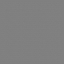

-


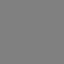

-


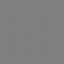

-


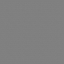

-


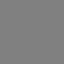

-


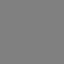

-


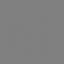

-


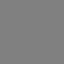

-


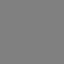

-


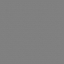

-


In [8]:
from PIL import Image

for i in range(0,10):
    im = Image.fromarray(X_train[i] * 255.0)
    if im.mode != 'RGB':
        im = im.convert('RGB')
    display(im)
    
    im = Image.fromarray(Ys[i])
    if im.mode != 'RGB':
        im = im.convert('RGB')
    display(im)
    print("-")

#### WGAN

In [9]:
import tensorflow as tf
from keras.layers import Dense, Flatten, Conv2D,Conv2DTranspose, BatchNormalization

def critic(x, is_training=True, reuse_variables=True):
    with tf.variable_scope('critic', reuse=reuse_variables):
        conv_0 = Conv2D(filters=128,
                                  kernel_size=(4, 4),
                                  strides=(2, 2),
                                  padding='same')(x)

        conv_1 = Conv2D(filters=256,
                                  kernel_size=(4, 4),
                                  strides=(2, 2),
                                  padding='same')(tf.nn.leaky_relu(conv_0))
        
        b_conv_1 = BatchNormalization()(conv_1, training=is_training)
        
        conv_2 = Conv2D(filters=512,
                                  kernel_size=(4, 4),
                                  strides=(2, 2),
                                  padding='same')(tf.nn.leaky_relu(b_conv_1))
        
        b_conv_2 = BatchNormalization()(conv_2, training=is_training)
        
        conv_3 = Conv2D(filters=1024,
                                  kernel_size=(4, 4),
                                  strides=(2, 2),
                                  padding='same')(tf.nn.leaky_relu(b_conv_2))
        
        b_conv_3 = BatchNormalization()(conv_3, training=is_training)
        
        conv_4 = Conv2D(filters=1,
                                  kernel_size=(4, 4),
                                  padding='valid')(tf.nn.leaky_relu(b_conv_3))
        
        return conv_4

In [11]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

graph = tf.Graph()

with graph.as_default():
    input_x = tf.placeholder(tf.float32, shape=(None, width, height, 1))
    input_z = tf.placeholder(tf.float32, shape=(None, code_length))
    is_training = tf.placeholder(tf.bool)
    
    gen = generator(z=tf.reshape(input_z, (-1, 1, 1, code_length)), is_training=is_training)
    
    r_input_x = tf.image.resize_images(images=input_x, size=(64, 64))
        
    crit_1_l = critic(x=r_input_x, is_training=is_training, reuse_variables=False)
    crit_2_l = critic(x=gen, is_training=is_training, reuse_variables=True)
    
    loss_c = tf.reduce_mean(crit_2_l - crit_1_l)
    loss_g = tf.reduce_mean(-crit_2_l)
    
    variables_g = [variable for variable in tf.trainable_variables() if variable.name.startswith('generator')]
    variables_c = [variable for variable in tf.trainable_variables() if variable.name.startswith('critic')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        optimizer_c = tf.train.AdamOptimizer(0.00005, beta1=0.5, beta2=0.9).minimize(loss=loss_c, var_list=variables_c)
        
        with tf.control_dependencies([optimizer_c]):
            training_step_c = tf.tuple(tensors=[tf.assign(variable, tf.clip_by_value(variable, -0.01, 0.01)) 
                                                for variable in variables_c])
        
        training_step_g = tf.train.AdamOptimizer(0.00005, beta1=0.5, beta2=0.9).minimize(loss=loss_g, var_list=variables_g)


In [13]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

nb_epochs = 200
nb_critic = 5
batch_size = 64
nb_iterations = int(nb_samples / batch_size)

session = tf.InteractiveSession(graph=graph)
tf.global_variables_initializer().run()

samples_range = np.arange(nb_samples)

for e in range(nb_epochs):
    c_losses = []
    g_losses = []
    
    for i in range(nb_iterations):
        for j in range(nb_critic):
            print(i,"/",nb_iterations, "-",j,"/", nb_critic)
            Xi = np.random.choice(samples_range, size=batch_size)
            X = np.expand_dims(X_train[Xi], axis=3)
            Z = np.random.uniform(-1.0, 1.0, size=(batch_size, code_length)).astype(np.float32)
            
            _, c_loss = session.run([training_step_c, loss_c], 
                                    feed_dict={
                                        input_x: X,
                                        input_z: Z,
                                        is_training: True
                                    })
            c_losses.append(c_loss)
        
        Z = np.random.uniform(-1.0, 1.0, size=(batch_size, code_length)).astype(np.float32)
        
        _, g_loss = session.run([training_step_g, loss_g], 
                                feed_dict={
                                    input_x: np.zeros(shape=(batch_size, width, height, 1)),
                                    input_z: Z,
                                    is_training: True
                                })
        
        g_losses.append(g_loss)
        
    print('Epoch {}) Avg. critic loss: {} - Avg. generator loss: {}'.format(e + 1, np.mean(c_losses), np.mean(g_losses)))


0 / 78 0 / 5
0 / 78 1 / 5
0 / 78 2 / 5


KeyboardInterrupt: 

In [14]:
Z = np.random.uniform(-1.0, 1.0, size=(50, code_length)).astype(np.float32)

Ys = session.run([gen], 
                 feed_dict={
                     input_z: Z,
                     is_training: False
                })

Ys = np.squeeze((Ys[0] + 1.0) * 0.5 * 255.0).astype(np.uint8)


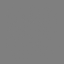

-


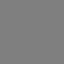

-


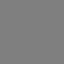

-


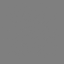

-


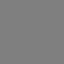

-


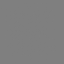

-


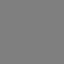

-


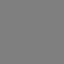

-


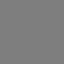

-


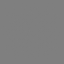

-


In [15]:
from PIL import Image

for i in range(0,10):
    im = Image.fromarray(X_train[i] * 255.0)
    if im.mode != 'RGB':
        im = im.convert('RGB')
    display(im)
    
    im = Image.fromarray(Ys[i])
    if im.mode != 'RGB':
        im = im.convert('RGB')
    display(im)
    print("-")